<a href="https://colab.research.google.com/github/paulmachau/Phase3-project.May/blob/main/H1N1_%26_Seasonal_Flu.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#import necessary libraries
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm

from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeClassifier, plot_tree, export_graphviz
from sklearn.linear_model import LogisticRegression
from imblearn.over_sampling import SMOTE
from sklearn import tree

In [ ]:
# Loading in the data from csv files.
features_df = pd.read_csv("training_set_features.csv")
target = pd.read_csv("training_set_labels.csv")
submission = pd.read_csv("submission_format.csv")
test_feature = pd.read_csv("test_set_feature.csv")

In [ ]:
# summary of the data in the training_set_features
features_df.head()

,respondent_id,h1n1_concern,h1n1_knowledge,behavioral_antiviral_meds,behavioral_avoidance,behavioral_face_mask,behavioral_wash_hands,behavioral_large_gatherings,behavioral_outside_home,behavioral_touch_face,...,income_poverty,marital_status,rent_or_own,employment_status,hhs_geo_region,census_msa,household_adults,household_children,employment_industry,employment_occupation
0,0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,...,Below Poverty,Not Married,Own,Not in Labor Force,oxchjgsf,Non-MSA,0.0,0.0,NaN,NaN
1,1,3.0,2.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,...,Below Poverty,Not Married,Rent,Employed,bhuqouqj,"MSA, Not Principle City",0.0,0.0,pxcmvdjn,xgwztkwe
2,2,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,"<= $75,000, Above Poverty",Not Married,Own,Employed,qufhixun,"MSA, Not Principle City",2.0,0.0,rucpziij,xtkaffoo
3,3,1.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,...,Below Poverty,Not Married,Rent,Not in Labor Force,lrircsnp,"MSA, Principle City",0.0,0.0,NaN,NaN
4,4,2.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,...,"<= $75,000, Above Poverty",Married,Own,Employed,qufhixun,"MSA, Not Principle City",1.0,0.0,wxleyezf,emcorrxb


In [ ]:
# summary of the data in the training_set_lables
target.head()

,respondent_id,h1n1_vaccine,seasonal_vaccine
0,0,0,0
1,1,0,1
2,2,0,0
3,3,0,1
4,4,0,0


In [ ]:
# summary of the data in the submission_format
submission.head()

,respondent_id,h1n1_vaccine,seasonal_vaccine
0,26707,0.5,0.7
1,26708,0.5,0.7
2,26709,0.5,0.7
3,26710,0.5,0.7
4,26711,0.5,0.7


In [ ]:
# summary of the data in the test_set_features
test_feature.head()

,respondent_id,h1n1_concern,h1n1_knowledge,behavioral_antiviral_meds,behavioral_avoidance,behavioral_face_mask,behavioral_wash_hands,behavioral_large_gatherings,behavioral_outside_home,behavioral_touch_face,...,income_poverty,marital_status,rent_or_own,employment_status,hhs_geo_region,census_msa,household_adults,household_children,employment_industry,employment_occupation
0,26707,2.0,2.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,...,"> $75,000",Not Married,Rent,Employed,mlyzmhmf,"MSA, Not Principle City",1.0,0.0,atmlpfrs,hfxkjkmi
1,26708,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,Below Poverty,Not Married,Rent,Employed,bhuqouqj,Non-MSA,3.0,0.0,atmlpfrs,xqwwgdyp
2,26709,2.0,2.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,...,"> $75,000",Married,Own,Employed,lrircsnp,Non-MSA,1.0,0.0,nduyfdeo,pvmttkik
3,26710,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,"<= $75,000, Above Poverty",Married,Own,Not in Labor Force,lrircsnp,"MSA, Not Principle City",1.0,0.0,NaN,NaN
4,26711,3.0,1.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0,...,"<= $75,000, Above Poverty",Not Married,Own,Employed,lzgpxyit,Non-MSA,0.0,1.0,fcxhlnwr,mxkfnird


**Data Preparation**

> Indented block







In [ ]:
#summary of the data
features_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26707 entries, 0 to 26706
Data columns (total 36 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   respondent_id                26707 non-null  int64  
 1   h1n1_concern                 26615 non-null  float64
 2   h1n1_knowledge               26591 non-null  float64
 3   behavioral_antiviral_meds    26636 non-null  float64
 4   behavioral_avoidance         26499 non-null  float64
 5   behavioral_face_mask         26688 non-null  float64
 6   behavioral_wash_hands        26665 non-null  float64
 7   behavioral_large_gatherings  26620 non-null  float64
 8   behavioral_outside_home      26625 non-null  float64
 9   behavioral_touch_face        26579 non-null  float64
 10  doctor_recc_h1n1             24547 non-null  float64
 11  doctor_recc_seasonal         24547 non-null  float64
 12  chronic_med_condition        25736 non-null  float64
 13  child_under_6_mo

In [ ]:
#summary of the target data
target.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26707 entries, 0 to 26706
Data columns (total 3 columns):
 #   Column            Non-Null Count  Dtype
---  ------            --------------  -----
 0   respondent_id     26707 non-null  int64
 1   h1n1_vaccine      26707 non-null  int64
 2   seasonal_vaccine  26707 non-null  int64
dtypes: int64(3)
memory usage: 626.1 KB


In [ ]:
# Load the training set features
features_df = pd.read_csv("training_set_features.csv")

# Load the training set labels
target = pd.read_csv("training_set_labels.csv")


In [ ]:
# Merge the features and labels on 'respondent_id'
merged_df = pd.merge(features_df, target, on='respondent_id')
merged_df.head()

,respondent_id,h1n1_concern,h1n1_knowledge,behavioral_antiviral_meds,behavioral_avoidance,behavioral_face_mask,behavioral_wash_hands,behavioral_large_gatherings,behavioral_outside_home,behavioral_touch_face,...,rent_or_own,employment_status,hhs_geo_region,census_msa,household_adults,household_children,employment_industry,employment_occupation,h1n1_vaccine,seasonal_vaccine
0,0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,...,Own,Not in Labor Force,oxchjgsf,Non-MSA,0.0,0.0,NaN,NaN,0,0
1,1,3.0,2.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,...,Rent,Employed,bhuqouqj,"MSA, Not Principle City",0.0,0.0,pxcmvdjn,xgwztkwe,0,1
2,2,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,Own,Employed,qufhixun,"MSA, Not Principle City",2.0,0.0,rucpziij,xtkaffoo,0,0
3,3,1.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,...,Rent,Not in Labor Force,lrircsnp,"MSA, Principle City",0.0,0.0,NaN,NaN,0,1
4,4,2.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,...,Own,Employed,qufhixun,"MSA, Not Principle City",1.0,0.0,wxleyezf,emcorrxb,0,0


In [ ]:
merged_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 26707 entries, 0 to 26706
Data columns (total 38 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   respondent_id                26707 non-null  int64  
 1   h1n1_concern                 26615 non-null  float64
 2   h1n1_knowledge               26591 non-null  float64
 3   behavioral_antiviral_meds    26636 non-null  float64
 4   behavioral_avoidance         26499 non-null  float64
 5   behavioral_face_mask         26688 non-null  float64
 6   behavioral_wash_hands        26665 non-null  float64
 7   behavioral_large_gatherings  26620 non-null  float64
 8   behavioral_outside_home      26625 non-null  float64
 9   behavioral_touch_face        26579 non-null  float64
 10  doctor_recc_h1n1             24547 non-null  float64
 11  doctor_recc_seasonal         24547 non-null  float64
 12  chronic_med_condition        25736 non-null  float64
 13  child_under_6_mo

In [ ]:
# Check for missing values
print(merged_df.isnull().sum())

respondent_id                      0
h1n1_concern                      92
h1n1_knowledge                   116
behavioral_antiviral_meds         71
behavioral_avoidance             208
behavioral_face_mask              19
behavioral_wash_hands             42
behavioral_large_gatherings       87
behavioral_outside_home           82
behavioral_touch_face            128
doctor_recc_h1n1                2160
doctor_recc_seasonal            2160
chronic_med_condition            971
child_under_6_months             820
health_worker                    804
health_insurance               12274
opinion_h1n1_vacc_effective      391
opinion_h1n1_risk                388
opinion_h1n1_sick_from_vacc      395
opinion_seas_vacc_effective      462
opinion_seas_risk                514
opinion_seas_sick_from_vacc      537
age_group                          0
education                       1407
race                               0
sex                                0
income_poverty                  4423
m

In [ ]:
merged_df.head()

,respondent_id,h1n1_concern,h1n1_knowledge,behavioral_antiviral_meds,behavioral_avoidance,behavioral_face_mask,behavioral_wash_hands,behavioral_large_gatherings,behavioral_outside_home,behavioral_touch_face,...,rent_or_own,employment_status,hhs_geo_region,census_msa,household_adults,household_children,employment_industry,employment_occupation,h1n1_vaccine,seasonal_vaccine
0,0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,...,Own,Not in Labor Force,oxchjgsf,Non-MSA,0.0,0.0,NaN,NaN,0,0
1,1,3.0,2.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,...,Rent,Employed,bhuqouqj,"MSA, Not Principle City",0.0,0.0,pxcmvdjn,xgwztkwe,0,1
2,2,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,Own,Employed,qufhixun,"MSA, Not Principle City",2.0,0.0,rucpziij,xtkaffoo,0,0
3,3,1.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,...,Rent,Not in Labor Force,lrircsnp,"MSA, Principle City",0.0,0.0,NaN,NaN,0,1
4,4,2.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,...,Own,Employed,qufhixun,"MSA, Not Principle City",1.0,0.0,wxleyezf,emcorrxb,0,0


In [ ]:
merged_df.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 26707 entries, 0 to 26706
Data columns (total 38 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   respondent_id                26707 non-null  int64  
 1   h1n1_concern                 26615 non-null  float64
 2   h1n1_knowledge               26591 non-null  float64
 3   behavioral_antiviral_meds    26636 non-null  float64
 4   behavioral_avoidance         26499 non-null  float64
 5   behavioral_face_mask         26688 non-null  float64
 6   behavioral_wash_hands        26665 non-null  float64
 7   behavioral_large_gatherings  26620 non-null  float64
 8   behavioral_outside_home      26625 non-null  float64
 9   behavioral_touch_face        26579 non-null  float64
 10  doctor_recc_h1n1             24547 non-null  float64
 11  doctor_recc_seasonal         24547 non-null  float64
 12  chronic_med_condition        25736 non-null  float64
 13  child_under_6_mo

In [ ]:
# Perform one-hot encoding on categorical variables
categorical_columns = ['age_group', 'education', 'race', 'sex', 'marital_status', 'rent_or_own', 'employment_status', 'hhs_geo_region', 'census_msa']
encoded_df = pd.get_dummies(merged_df, columns=categorical_columns)


In [ ]:
# Perform feature scaling on numerical variables
numerical_columns = ['h1n1_concern', 'h1n1_knowledge', 'behavioral_antiviral_meds', 'behavioral_avoidance', 'behavioral_face_mask', 'behavioral_wash_hands', 'behavioral_large_gatherings', 'behavioral_outside_home', 'behavioral_touch_face', 'doctor_recc_h1n1', 'doctor_recc_seasonal', 'chronic_med_condition', 'child_under_6_months', 'health_worker', 'health_insurance', 'opinion_h1n1_vacc_effective', 'opinion_h1n1_risk', 'opinion_h1n1_sick_from_vacc', 'opinion_seas_vacc_effective', 'opinion_seas_risk', 'opinion_seas_sick_from_vacc', 'household_adults', 'household_children']
scaler = StandardScaler()
encoded_df[numerical_columns] = scaler.fit_transform(encoded_df[numerical_columns])


In [ ]:
# Check for duplicates
duplicates = encoded_df.duplicated()
print("Number of duplicate rows:", duplicates.sum())


Number of duplicate rows: 0


In [ ]:
# Select numerical columns for outlier detection and visualization
numerical_columns = encoded_df.select_dtypes(include=[np.number]).columns

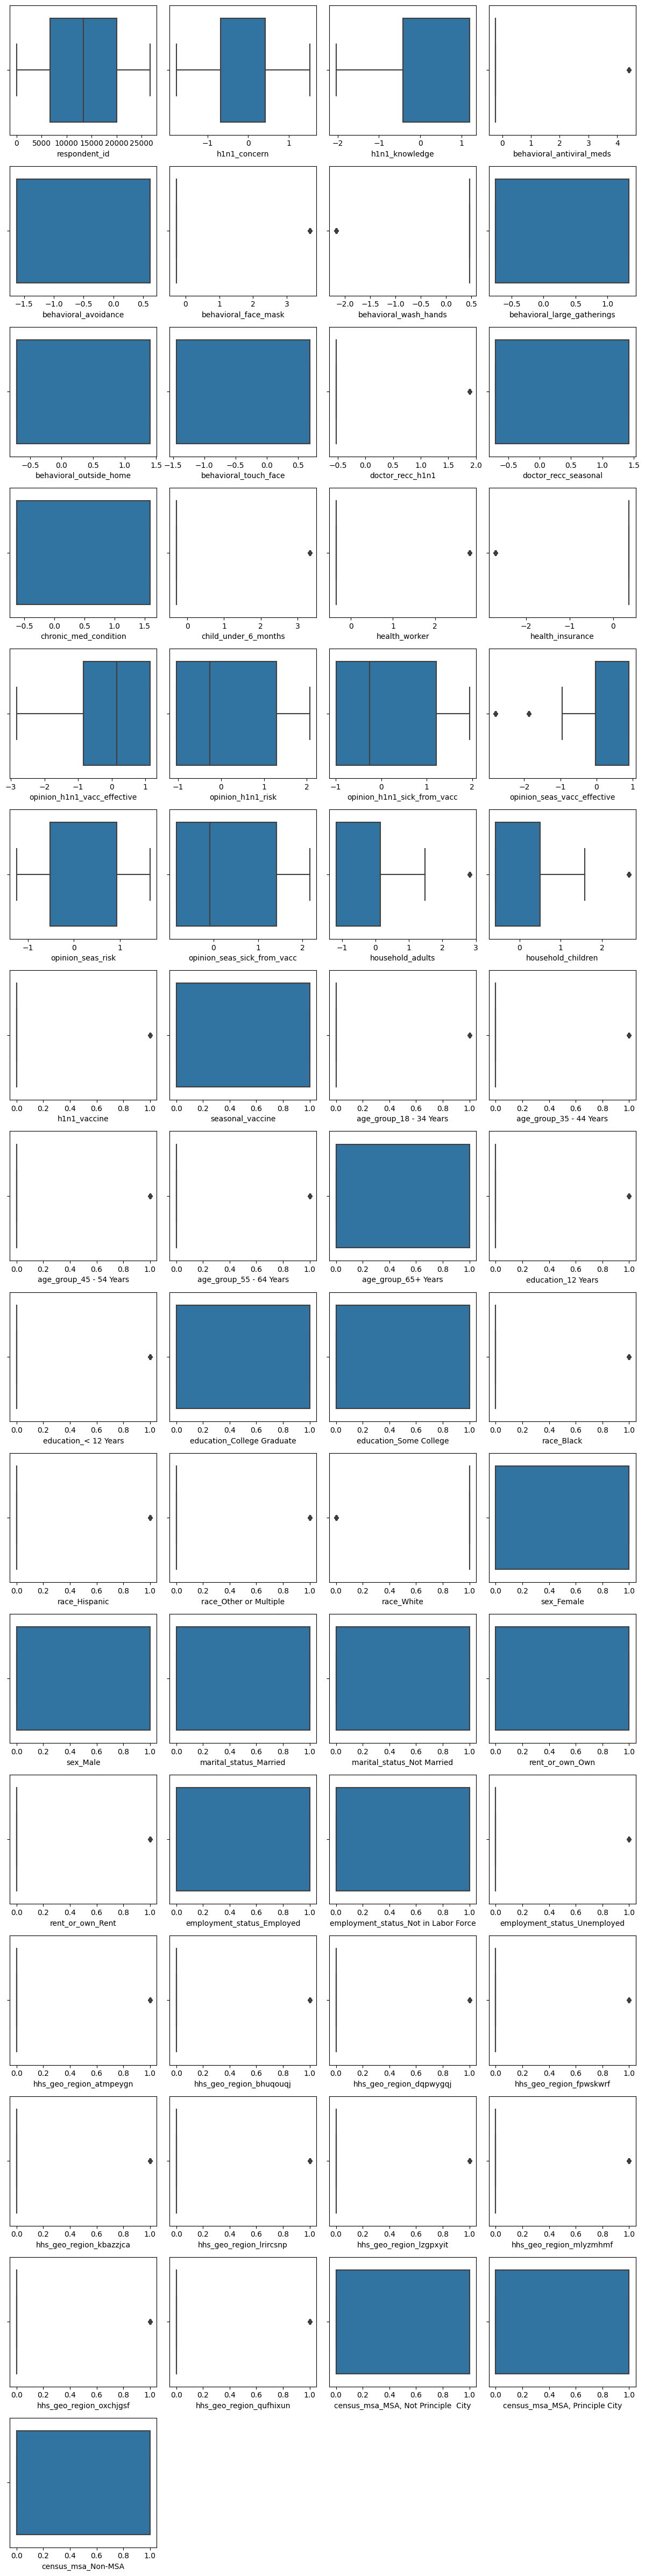

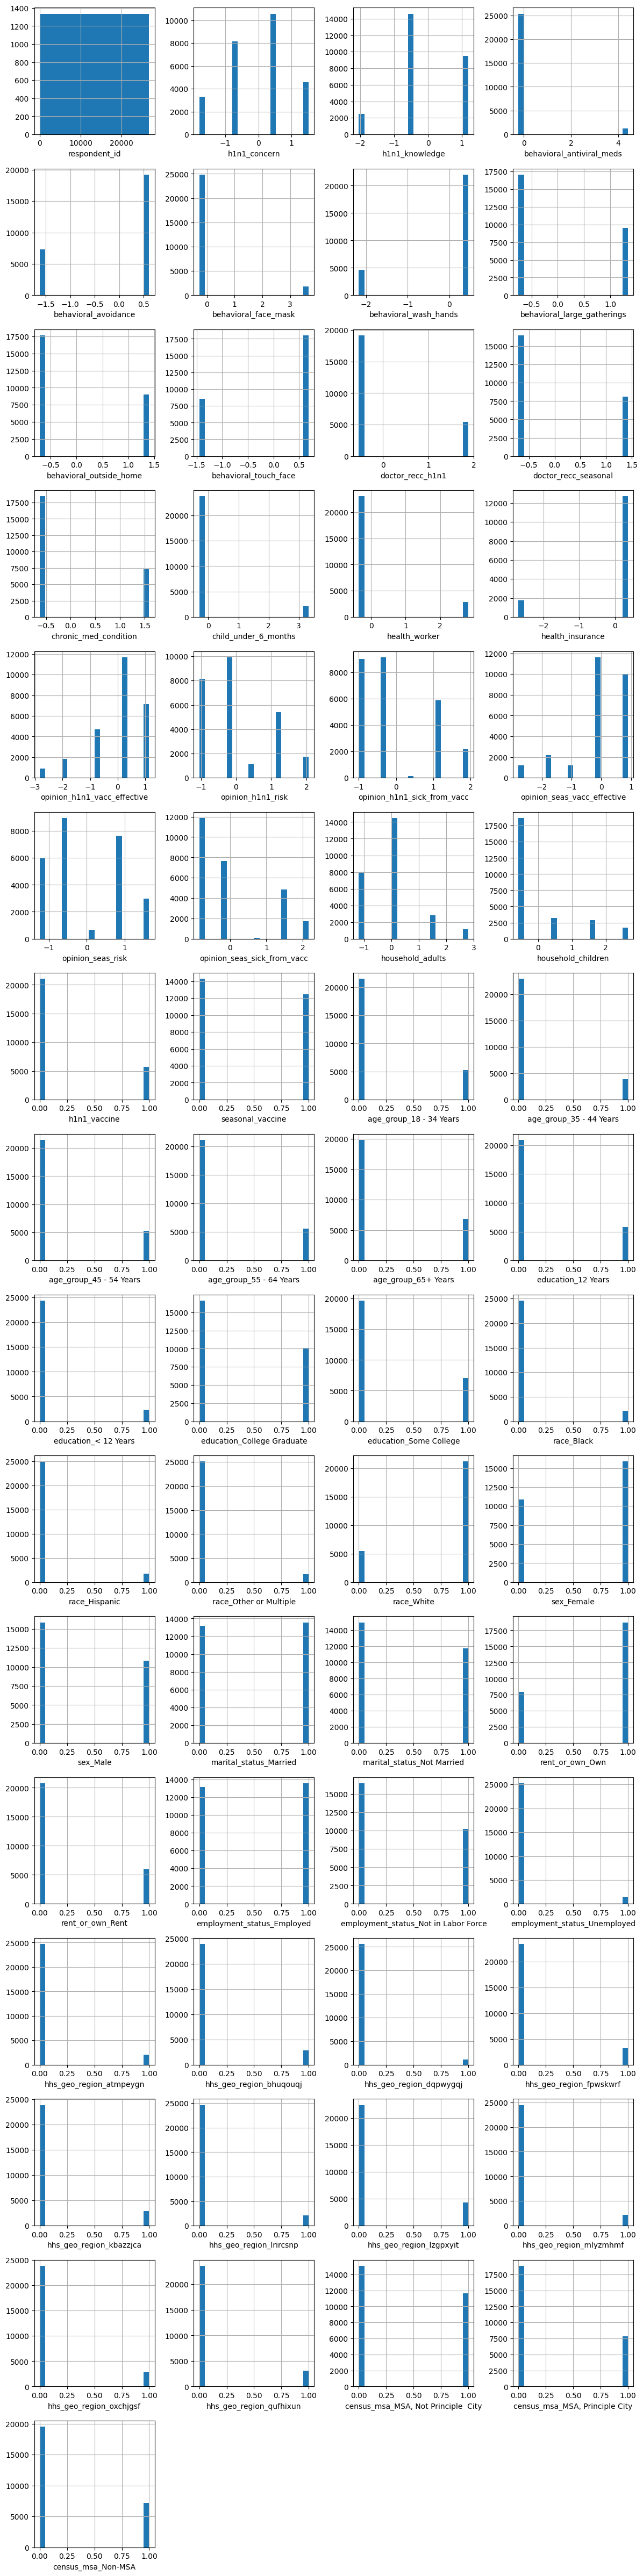

In [ ]:
# Select numerical columns for outlier detection and visualization
numerical_columns = encoded_df.select_dtypes(include=[np.number]).columns

num_cols = len(numerical_columns)
num_rows = int(np.ceil(num_cols / 4))  # Calculate the number of subplot rows

# Check for outliers
plt.figure(figsize=(12, num_rows * 3))
for i, column in enumerate(numerical_columns, 1):
    plt.subplot(num_rows, 4, i)
    sns.boxplot(data=encoded_df, x=column)
    plt.xlabel(column)
plt.tight_layout()
plt.show()

# Visualize histograms
plt.figure(figsize=(12, num_rows * 3))
for i, column in enumerate(numerical_columns, 1):
    plt.subplot(num_rows, 4, i)
    encoded_df[column].hist(bins=20)
    plt.xlabel(column)
plt.tight_layout()
plt.show()


behavioral_avoidance, behavioral_large_gatherings, behavioral_outside_home, and behavioral_touch_face variables have outliers towards the higher end. This indicates that there are respondents who exhibit extreme behaviors in these categories.

doctor_recc_h1n1 and doctor_recc_seasonal variables have outliers towards the higher end, suggesting that there are respondents who received strong recommendations from doctors for getting the H1N1 and seasonal vaccines.

opinion_h1n1_vacc_effective, opinion_h1n1_risk, opinion_h1n1_sick_from_vacc, opinion_seas_vacc_effective, opinion_seas_risk, and opinion_seas_sick_from_vacc variables have outliers towards both ends. This indicates that there is a wide range of opinions among the respondents regarding the effectiveness, risk, and perceived sickness from the vaccines.

household_adults and household_children variables have outliers towards the higher end, suggesting that some respondents have a larger number of adults and children in their households.



In [ ]:
# Calculate the IQR for each numerical column
Q1 = merged_df.quantile(0.25)
Q3 = merged_df.quantile(0.75)
IQR = Q3 - Q1

# Define a threshold for outlier detection
threshold = 2.0

# Identify the indices of outliers in each column
outliers = ((merged_df < (Q1 - threshold * IQR)) | (merged_df > (Q3 + threshold * IQR))).any(axis=1)



<ipython-input-20-194007f63daa>:2: FutureWarning: The default value of numeric_only in DataFrame.quantile is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  Q1 = merged_df.quantile(0.25)
<ipython-input-20-194007f63daa>:3: FutureWarning: The default value of numeric_only in DataFrame.quantile is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  Q3 = merged_df.quantile(0.75)
<ipython-input-20-194007f63daa>:10: FutureWarning: Automatic reindexing on DataFrame vs Series comparisons is deprecated and will raise ValueError in a future version. Do `left, right = left.align(right, axis=1, copy=False)` before e.g. `left == right`
  outliers = ((merged_df < (Q1 - threshold * IQR)) | (merged_df > (Q3 + threshold * IQR))).any(axis=1)


In [ ]:
merged_df.head()


,respondent_id,h1n1_concern,h1n1_knowledge,behavioral_antiviral_meds,behavioral_avoidance,behavioral_face_mask,behavioral_wash_hands,behavioral_large_gatherings,behavioral_outside_home,behavioral_touch_face,...,rent_or_own,employment_status,hhs_geo_region,census_msa,household_adults,household_children,employment_industry,employment_occupation,h1n1_vaccine,seasonal_vaccine
0,0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,...,Own,Not in Labor Force,oxchjgsf,Non-MSA,0.0,0.0,NaN,NaN,0,0
1,1,3.0,2.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,...,Rent,Employed,bhuqouqj,"MSA, Not Principle City",0.0,0.0,pxcmvdjn,xgwztkwe,0,1
2,2,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,Own,Employed,qufhixun,"MSA, Not Principle City",2.0,0.0,rucpziij,xtkaffoo,0,0
3,3,1.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,...,Rent,Not in Labor Force,lrircsnp,"MSA, Principle City",0.0,0.0,NaN,NaN,0,1
4,4,2.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,...,Own,Employed,qufhixun,"MSA, Not Principle City",1.0,0.0,wxleyezf,emcorrxb,0,0


In [ ]:
merged_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 26707 entries, 0 to 26706
Data columns (total 38 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   respondent_id                26707 non-null  int64  
 1   h1n1_concern                 26615 non-null  float64
 2   h1n1_knowledge               26591 non-null  float64
 3   behavioral_antiviral_meds    26636 non-null  float64
 4   behavioral_avoidance         26499 non-null  float64
 5   behavioral_face_mask         26688 non-null  float64
 6   behavioral_wash_hands        26665 non-null  float64
 7   behavioral_large_gatherings  26620 non-null  float64
 8   behavioral_outside_home      26625 non-null  float64
 9   behavioral_touch_face        26579 non-null  float64
 10  doctor_recc_h1n1             24547 non-null  float64
 11  doctor_recc_seasonal         24547 non-null  float64
 12  chronic_med_condition        25736 non-null  float64
 13  child_under_6_mo

EDA

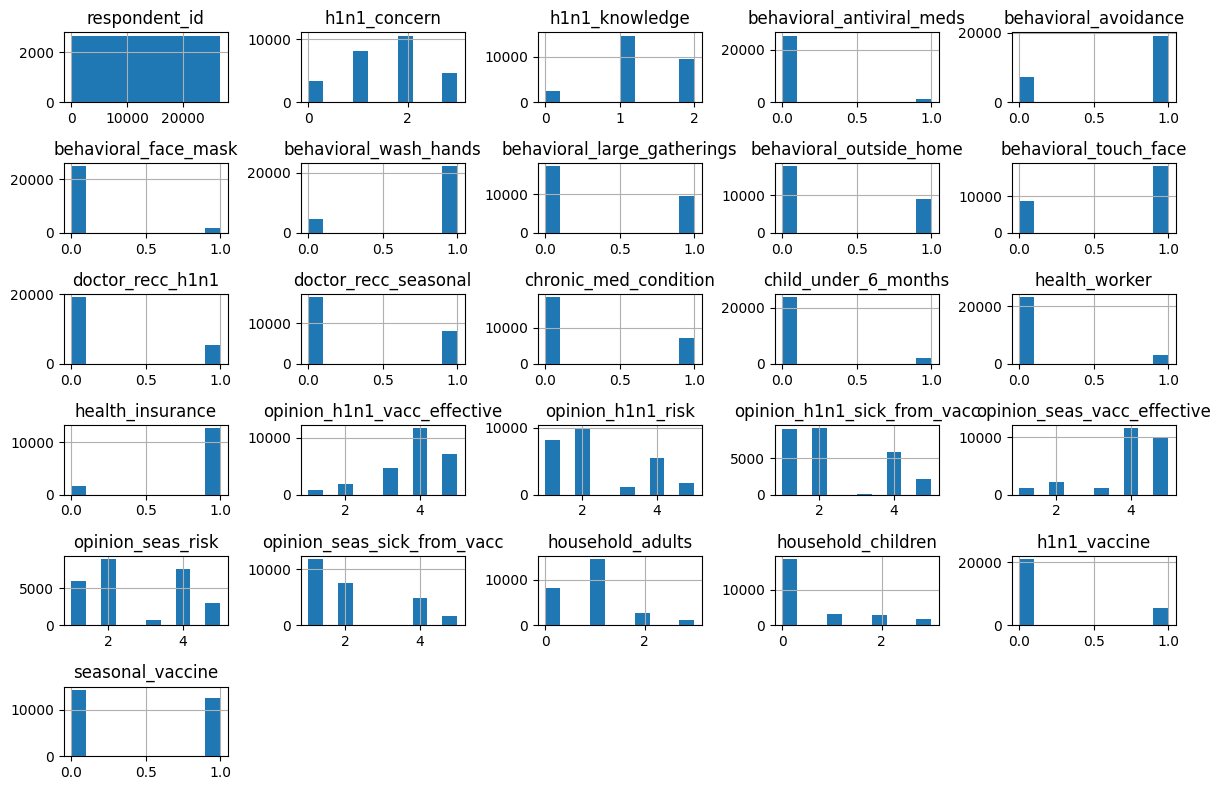

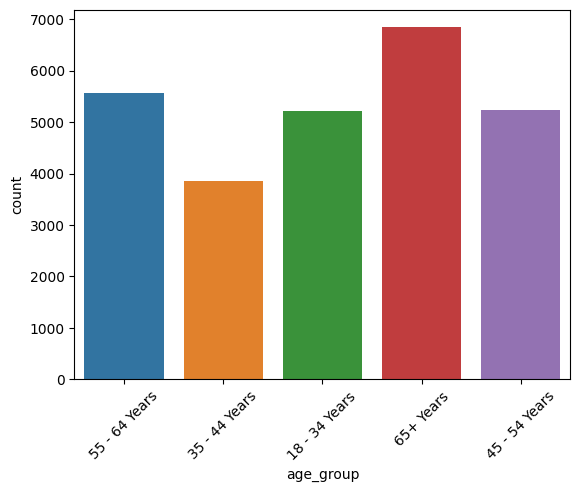

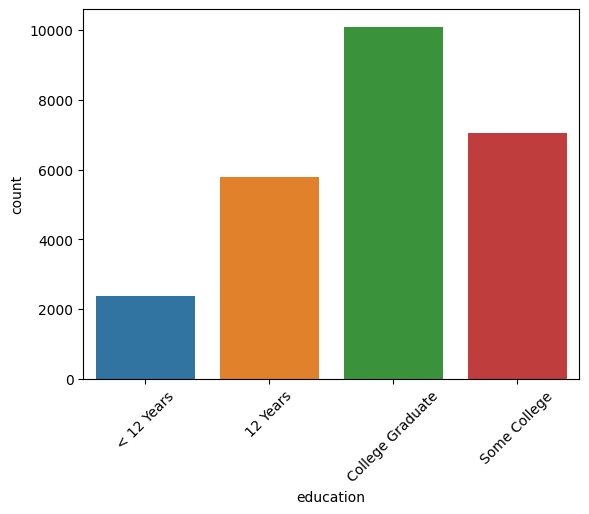

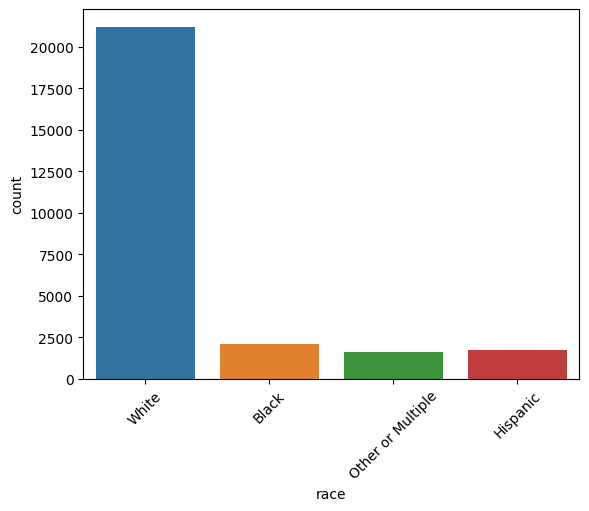

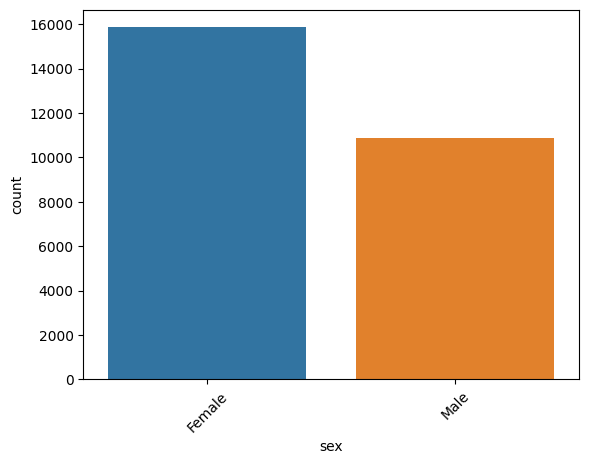

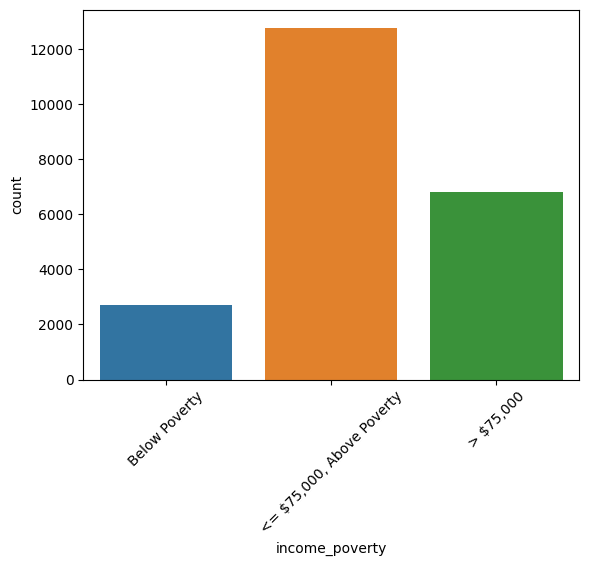

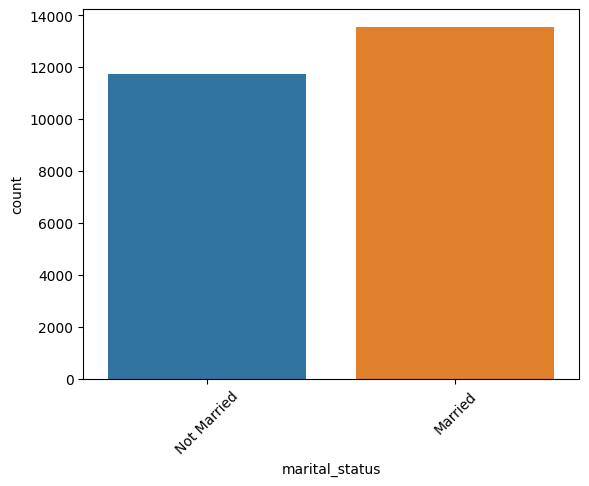

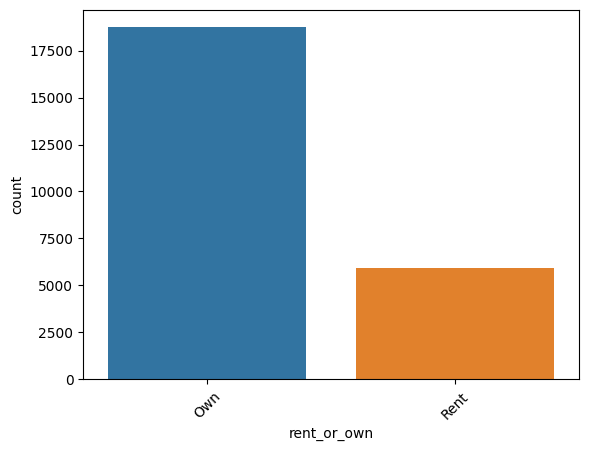

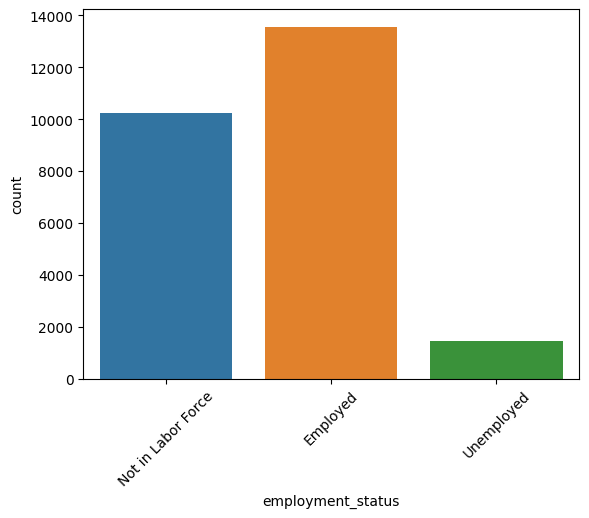

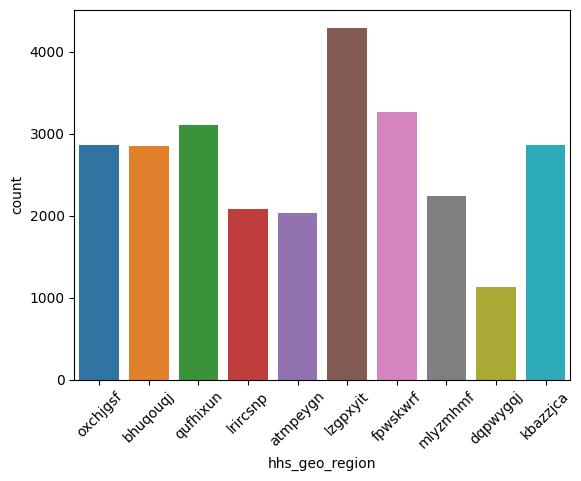

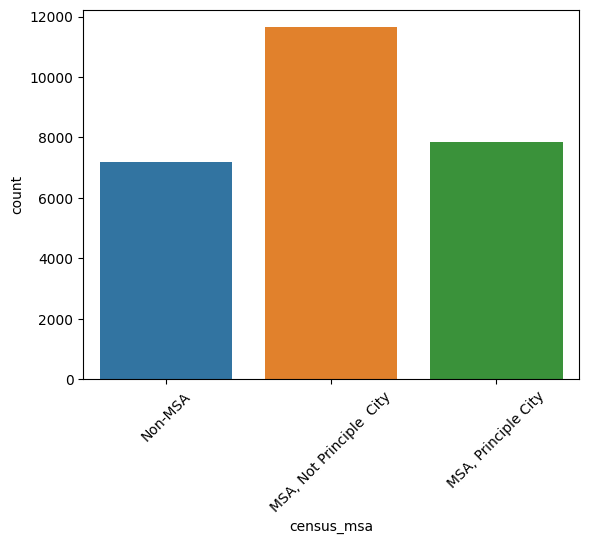

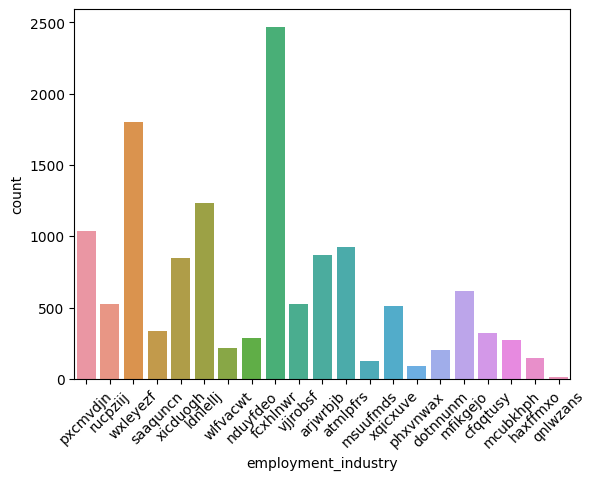

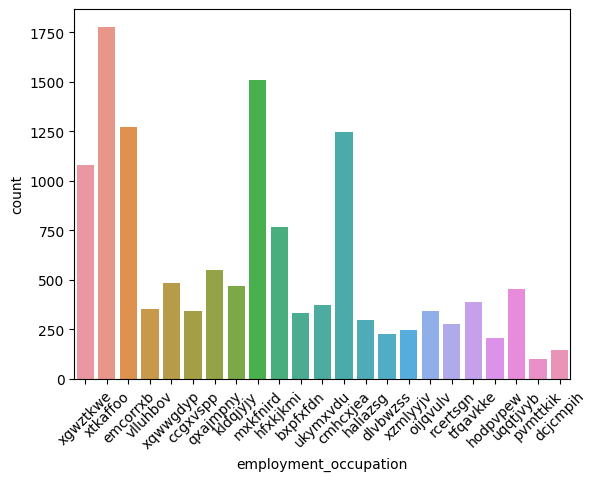

In [ ]:
#Data distribution 
import seaborn as sns
import matplotlib.pyplot as plt

# Plot histogram for each numerical variable
merged_df.hist(figsize=(12, 8))
plt.tight_layout()
plt.show()

# Plot countplot for each categorical variable
categorical_cols = merged_df.select_dtypes(include='object').columns
for col in categorical_cols:
    sns.countplot(data=merged_df, x=col)
    plt.xticks(rotation=45)
    plt.show()


In [ ]:
merged_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 26707 entries, 0 to 26706
Data columns (total 38 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   respondent_id                26707 non-null  int64  
 1   h1n1_concern                 26615 non-null  float64
 2   h1n1_knowledge               26591 non-null  float64
 3   behavioral_antiviral_meds    26636 non-null  float64
 4   behavioral_avoidance         26499 non-null  float64
 5   behavioral_face_mask         26688 non-null  float64
 6   behavioral_wash_hands        26665 non-null  float64
 7   behavioral_large_gatherings  26620 non-null  float64
 8   behavioral_outside_home      26625 non-null  float64
 9   behavioral_touch_face        26579 non-null  float64
 10  doctor_recc_h1n1             24547 non-null  float64
 11  doctor_recc_seasonal         24547 non-null  float64
 12  chronic_med_condition        25736 non-null  float64
 13  child_under_6_mo

Demographic information Distribution

In [ ]:
merged_df['age_group'].value_counts()


65+ Years        6843
55 - 64 Years    5563
45 - 54 Years    5238
18 - 34 Years    5215
35 - 44 Years    3848
Name: age_group, dtype: int64

In [ ]:
merged_df['race'].value_counts()

White                21222
Black                 2118
Hispanic              1755
Other or Multiple     1612
Name: race, dtype: int64

In [ ]:
merged_df['sex'].value_counts()

Female    15858
Male      10849
Name: sex, dtype: int64

In [ ]:
merged_df['education'].value_counts()

College Graduate    10097
Some College         7043
12 Years             5797
< 12 Years           2363
Name: education, dtype: int64

In [ ]:
merged_df['marital_status'].value_counts()

Married        13555
Not Married    11744
Name: marital_status, dtype: int64

In [ ]:
target['h1n1_vaccine'].value_counts(normalize=True)

0    0.787546
1    0.212454
Name: h1n1_vaccine, dtype: float64

In [ ]:
target['seasonal_vaccine'].value_counts(normalize=True)

0    0.534392
1    0.465608
Name: seasonal_vaccine, dtype: float64

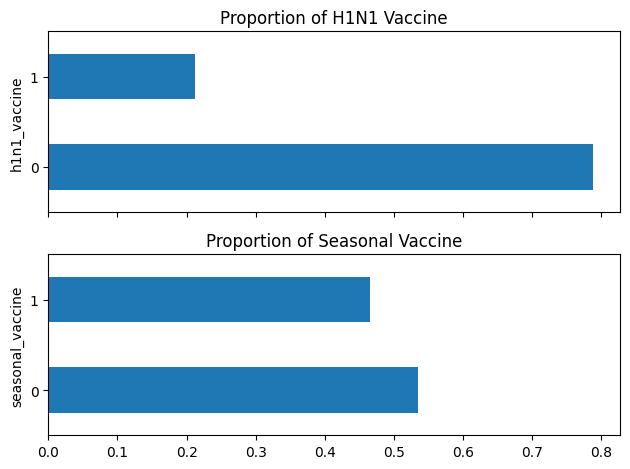

In [ ]:
fig, ax = plt.subplots(2, 1, sharex=True)

n_obs = target.shape[0]

(target['h1n1_vaccine']
    .value_counts()
    .div(n_obs)
    .plot.barh(title="Proportion of H1N1 Vaccine", ax=ax[0])
)
ax[0].set_ylabel("h1n1_vaccine")

(target['seasonal_vaccine']
    .value_counts()
    .div(n_obs)
    .plot.barh(title="Proportion of Seasonal Vaccine", ax=ax[1])
)
ax[1].set_ylabel("seasonal_vaccine")

fig.tight_layout()

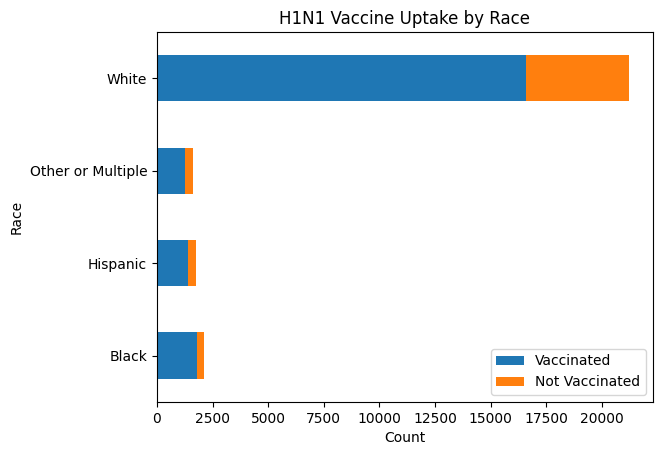

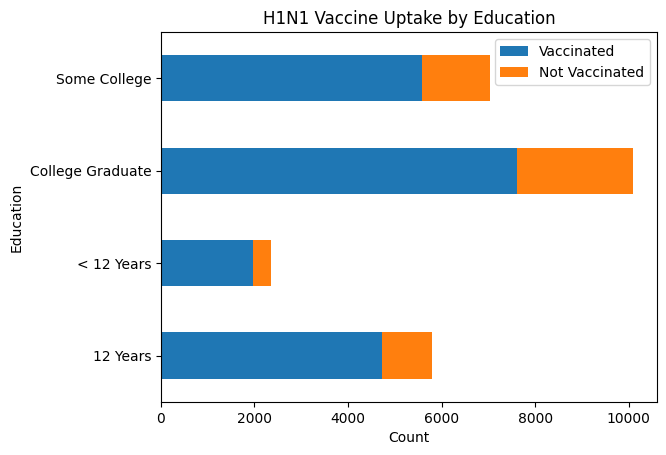

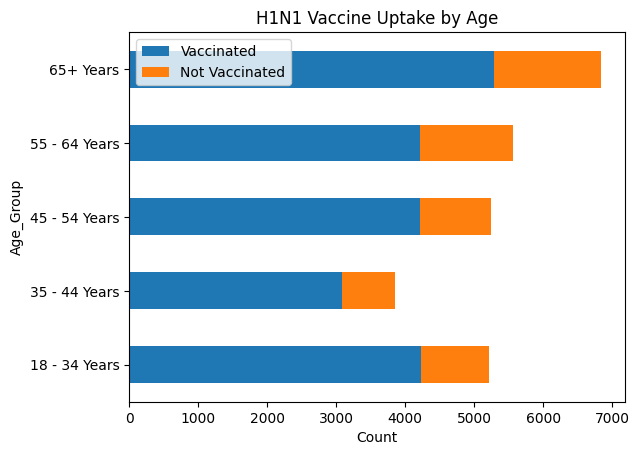

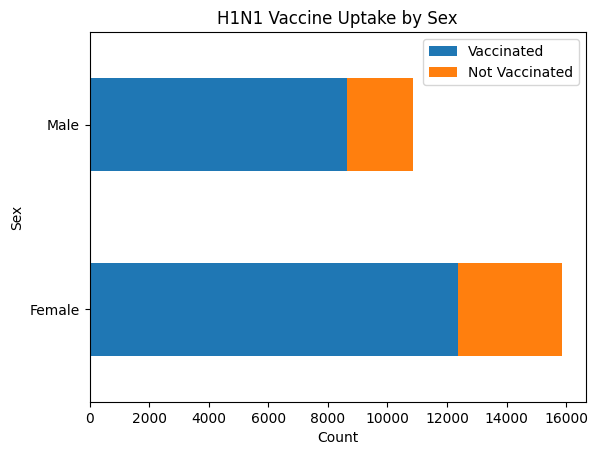

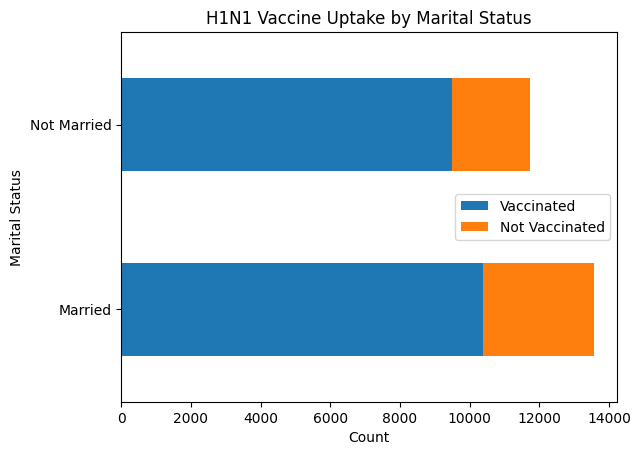

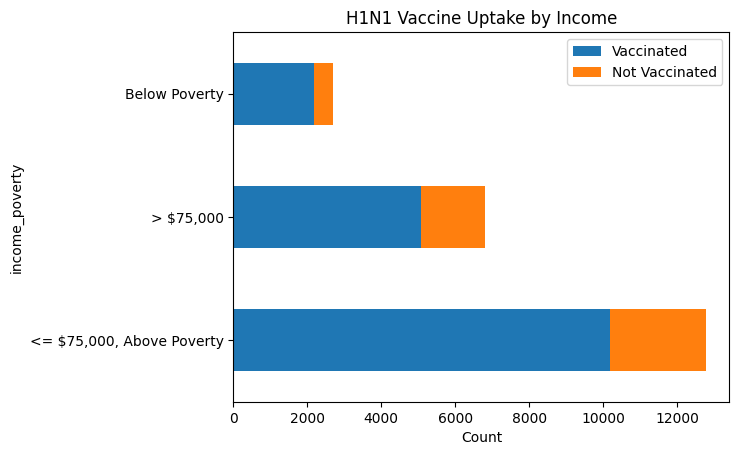

In [ ]:
import matplotlib.pyplot as plt

# Calculate counts of respondents by demographic category and vaccine status
race_vaccine_counts = merged_df.groupby(['race', 'h1n1_vaccine']).size().unstack()
education_vaccine_counts = merged_df.groupby(['education', 'h1n1_vaccine']).size().unstack()
age_vaccine_counts = merged_df.groupby(['age_group', 'h1n1_vaccine']).size().unstack()
sex_vaccine_counts = merged_df.groupby(['sex', 'h1n1_vaccine']).size().unstack()
marital_status_vaccine_counts = merged_df.groupby(['marital_status', 'h1n1_vaccine']).size().unstack()
income_vaccine_counts = merged_df.groupby(['income_poverty', 'h1n1_vaccine']).size().unstack()

# Plot the counts for each demographic category
race_vaccine_counts.plot(kind='barh', stacked=True)
plt.xlabel('Count')
plt.ylabel('Race')
plt.title('H1N1 Vaccine Uptake by Race')
plt.legend(['Vaccinated', 'Not Vaccinated'])
plt.show()

education_vaccine_counts.plot(kind='barh', stacked=True)
plt.xlabel('Count')
plt.ylabel('Education')
plt.title('H1N1 Vaccine Uptake by Education')
plt.legend(['Vaccinated', 'Not Vaccinated'])
plt.show()

age_vaccine_counts.plot(kind='barh', stacked=True)
plt.xlabel('Count')
plt.ylabel('Age_Group')
plt.title('H1N1 Vaccine Uptake by Age')
plt.legend(['Vaccinated', 'Not Vaccinated'])
plt.show()

sex_vaccine_counts.plot(kind='barh', stacked=True)
plt.xlabel('Count')
plt.ylabel('Sex')
plt.title('H1N1 Vaccine Uptake by Sex')
plt.legend(['Vaccinated', 'Not Vaccinated'])
plt.show()

marital_status_vaccine_counts.plot(kind='barh', stacked=True)
plt.xlabel('Count')
plt.ylabel('Marital Status')
plt.title('H1N1 Vaccine Uptake by Marital Status')
plt.legend(['Vaccinated', 'Not Vaccinated'])
plt.show()

income_vaccine_counts.plot(kind='barh', stacked=True)
plt.xlabel('Count')
plt.ylabel('income_poverty')
plt.title('H1N1 Vaccine Uptake by Income')
plt.legend(['Vaccinated', 'Not Vaccinated'])
plt.show()


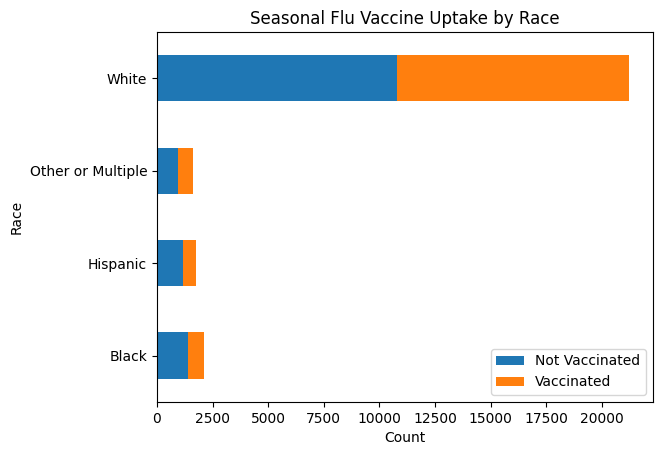

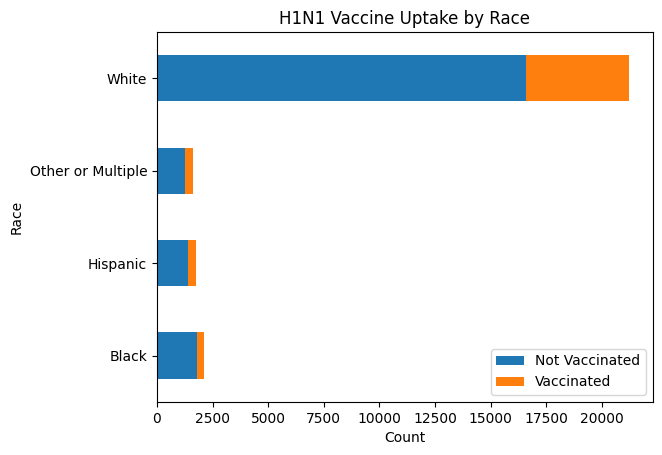

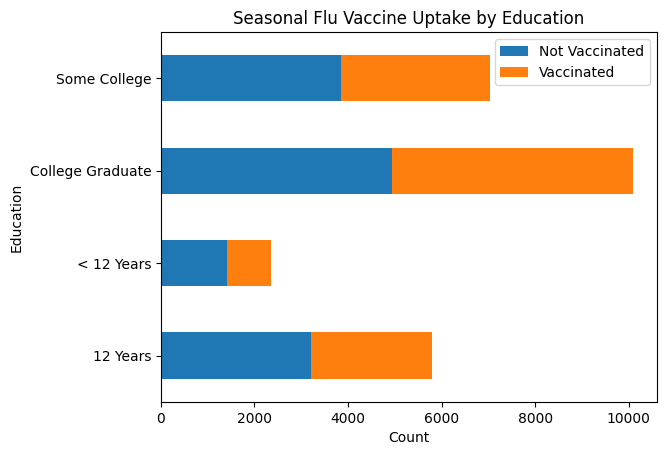

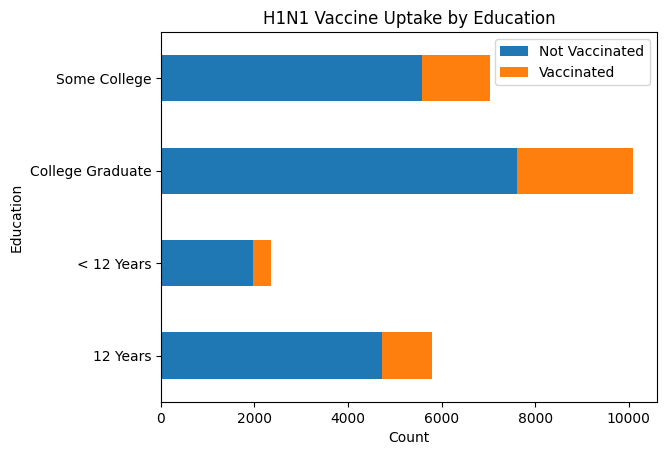

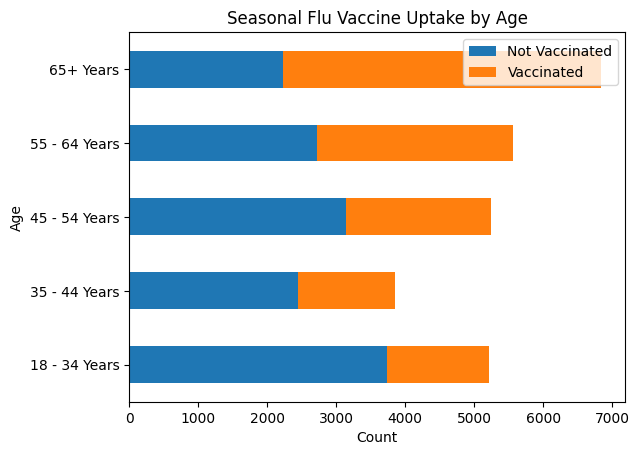

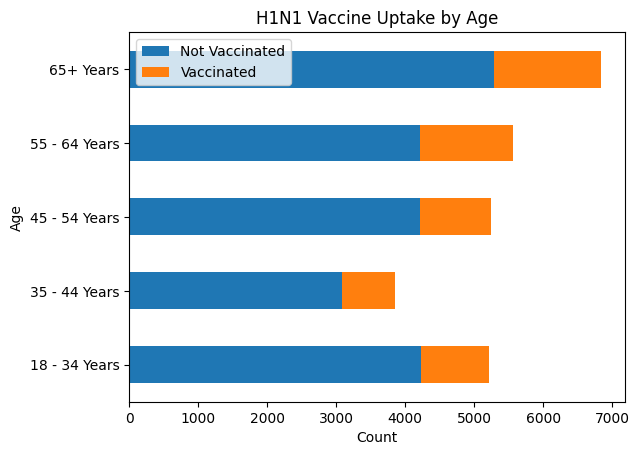

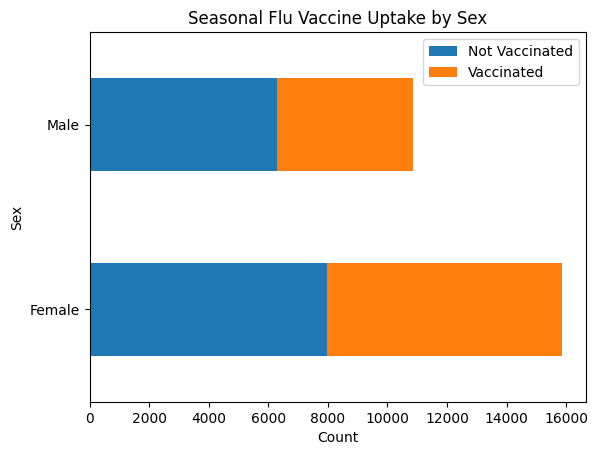

Text(0.5, 1.0, 'H1N1')

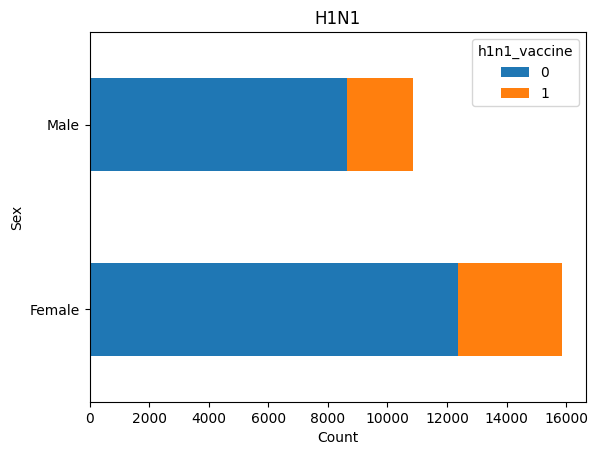

In [ ]:
import matplotlib.pyplot as plt

# Calculate counts of respondents by demographic category and vaccine status
race_seasonal_counts = merged_df.groupby(['race', 'seasonal_vaccine']).size().unstack()
race_h1n1_counts = merged_df.groupby(['race', 'h1n1_vaccine']).size().unstack()

education_seasonal_counts = merged_df.groupby(['education', 'seasonal_vaccine']).size().unstack()
education_h1n1_counts = merged_df.groupby(['education', 'h1n1_vaccine']).size().unstack()

age_seasonal_counts = merged_df.groupby(['age_group', 'seasonal_vaccine']).size().unstack()
age_h1n1_counts = merged_df.groupby(['age_group', 'h1n1_vaccine']).size().unstack()

sex_seasonal_counts = merged_df.groupby(['sex', 'seasonal_vaccine']).size().unstack()
sex_h1n1_counts = merged_df.groupby(['sex', 'h1n1_vaccine']).size().unstack()

marital_status_seasonal_counts = merged_df.groupby(['marital_status', 'seasonal_vaccine']).size().unstack()
marital_status_h1n1_counts = merged_df.groupby(['marital_status', 'h1n1_vaccine']).size().unstack()

income_seasonal_counts = merged_df.groupby(['income_poverty', 'seasonal_vaccine']).size().unstack()
income_h1n1_counts = merged_df.groupby(['income_poverty', 'h1n1_vaccine']).size().unstack()

# Plot the counts for each demographic category and vaccine status
race_seasonal_counts.plot(kind='barh', stacked=True)
plt.xlabel('Count')
plt.ylabel('Race')
plt.title('Seasonal Flu Vaccine Uptake by Race')
plt.legend(['Not Vaccinated', 'Vaccinated'])
plt.show()

race_h1n1_counts.plot(kind='barh', stacked=True)
plt.xlabel('Count')
plt.ylabel('Race')
plt.title('H1N1 Vaccine Uptake by Race')
plt.legend(['Not Vaccinated', 'Vaccinated'])
plt.show()

education_seasonal_counts.plot(kind='barh', stacked=True)
plt.xlabel('Count')
plt.ylabel('Education')
plt.title('Seasonal Flu Vaccine Uptake by Education')
plt.legend(['Not Vaccinated', 'Vaccinated'])
plt.show()

education_h1n1_counts.plot(kind='barh', stacked=True)
plt.xlabel('Count')
plt.ylabel('Education')
plt.title('H1N1 Vaccine Uptake by Education')
plt.legend(['Not Vaccinated', 'Vaccinated'])
plt.show()

age_seasonal_counts.plot(kind='barh', stacked=True)
plt.xlabel('Count')
plt.ylabel('Age')
plt.title('Seasonal Flu Vaccine Uptake by Age')
plt.legend(['Not Vaccinated', 'Vaccinated'])
plt.show()

age_h1n1_counts.plot(kind='barh', stacked=True)
plt.xlabel('Count')
plt.ylabel('Age')
plt.title('H1N1 Vaccine Uptake by Age')
plt.legend(['Not Vaccinated', 'Vaccinated'])
plt.show()

sex_seasonal_counts.plot(kind='barh', stacked=True)
plt.xlabel('Count')
plt.ylabel('Sex')
plt.title('Seasonal Flu Vaccine Uptake by Sex')
plt.legend(['Not Vaccinated', 'Vaccinated'])
plt.show()

sex_h1n1_counts.plot(kind='barh', stacked=True)
plt.xlabel('Count')
plt.ylabel('Sex')
plt.title('H1N1')



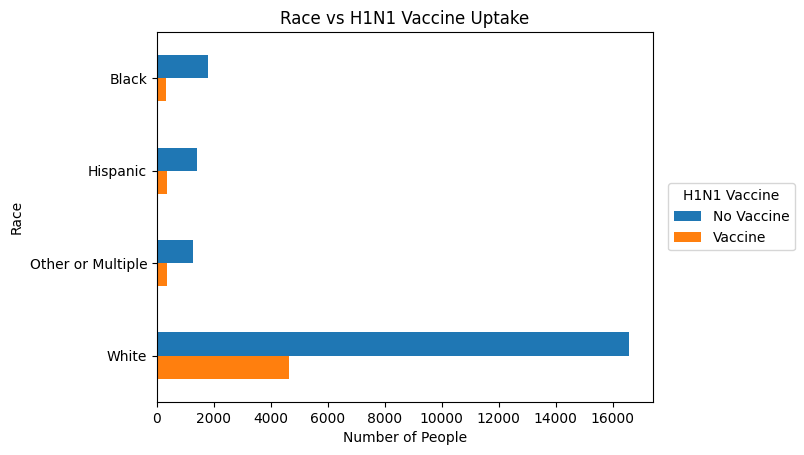

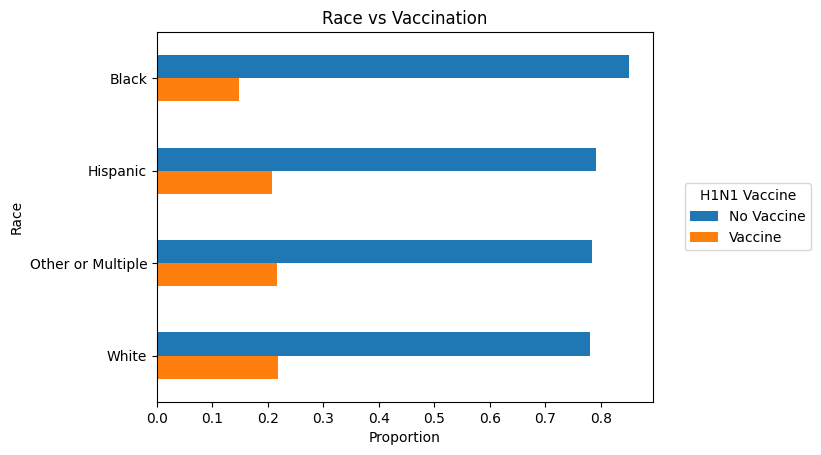

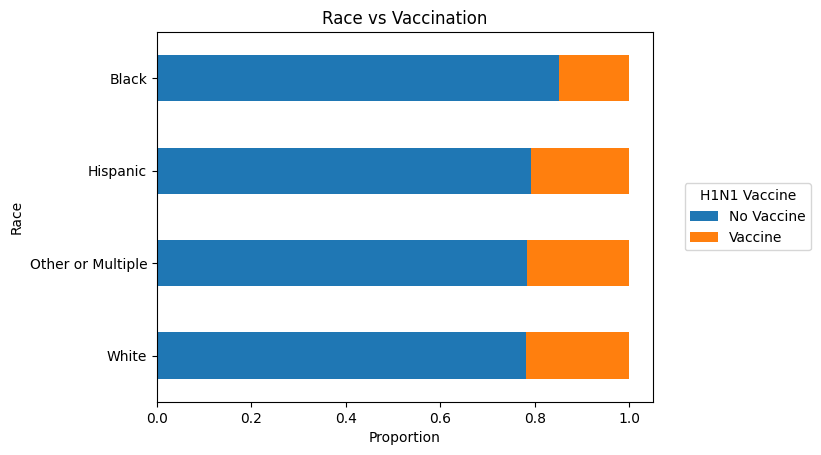

In [ ]:
import matplotlib.pyplot as plt

# Calculate counts of respondents by race and H1N1 vaccine uptake
race_counts = merged_df.groupby(['race', 'h1n1_vaccine']).size().unstack()

# Plot the counts
ax = race_counts.plot.barh()
ax.invert_yaxis()
ax.legend(['No Vaccine', 'Vaccine'], loc='center right', bbox_to_anchor=(1.3, 0.5), title='H1N1 Vaccine')
ax.set_ylabel('Race')
ax.set_xlabel('Number of People')
ax.set_title('Race vs H1N1 Vaccine Uptake')
plt.savefig('race.png', bbox_inches='tight', dpi=300)

# Calculate proportions of vaccine uptake by race
race_totals = race_counts.sum(axis='columns')
proportions = race_counts.div(race_totals, axis='index')

# Plot the proportions
ax = proportions.plot.barh()
ax.invert_yaxis()
ax.legend(['No Vaccine', 'Vaccine'], loc='center left', bbox_to_anchor=(1.05, 0.5), title='H1N1 Vaccine')
ax.set_ylabel('Race')
ax.set_xlabel('Proportion')
ax.set_title('Race vs H1N1 Vaccine Uptake')
plt.title('Race vs Vaccination')  # Update the title
plt.show()

# Plot the stacked proportions
ax = proportions.plot.barh(stacked=True)
ax.invert_yaxis()
ax.legend(['No Vaccine', 'Vaccine'], loc='center left', bbox_to_anchor=(1.05, 0.5), title='H1N1 Vaccine')
ax.set_ylabel('Race')
ax.set_xlabel('Proportion')
ax.set_title('Race vs H1N1 Vaccine Uptake')
plt.title('Race vs Vaccination')  # Update the title
plt.show()



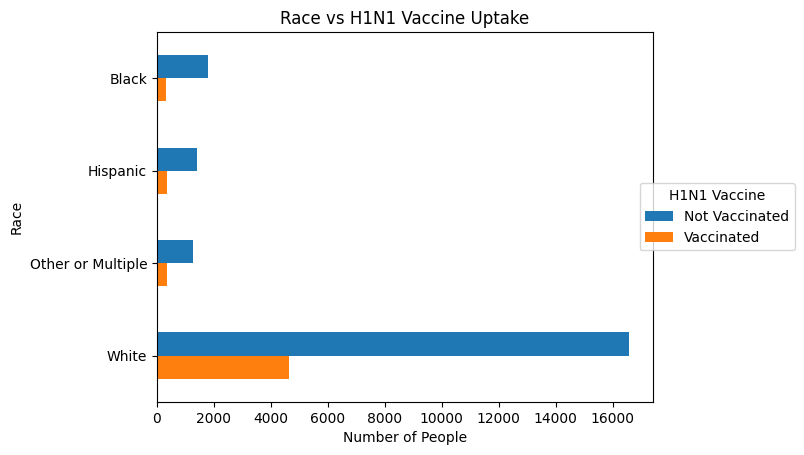

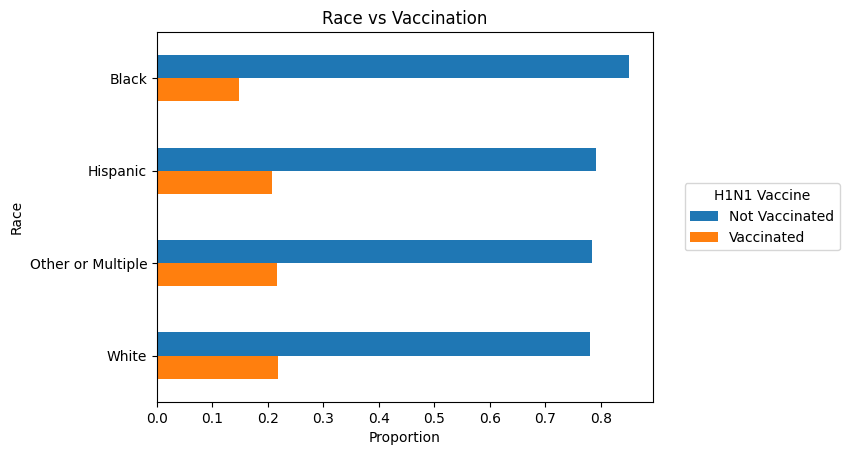

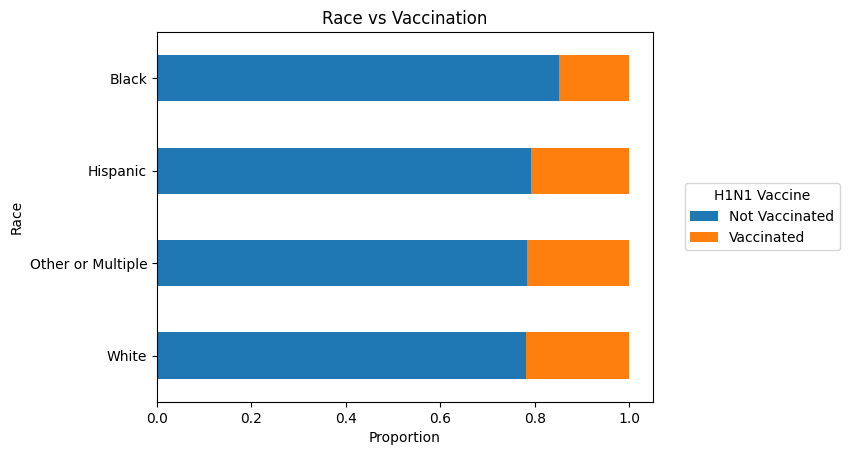

In [ ]:
import matplotlib.pyplot as plt

# Calculate counts of respondents by race and H1N1 vaccine uptake
race_counts = merged_df.groupby(['race', 'h1n1_vaccine']).size().unstack(fill_value=0)

# Plot the counts
ax = race_counts.plot.barh()
ax.invert_yaxis()
ax.legend(['Not Vaccinated', 'Vaccinated'], loc='center right', bbox_to_anchor=(1.3, 0.5), title='H1N1 Vaccine')
ax.set_ylabel('Race')
ax.set_xlabel('Number of People')
ax.set_title('Race vs H1N1 Vaccine Uptake')
plt.savefig('race.png', bbox_inches='tight', dpi=300)

# Calculate proportions of vaccine uptake by race
race_totals = race_counts.sum(axis='columns')
proportions = race_counts.div(race_totals, axis='index')

# Plot the proportions
ax = proportions.plot.barh()
ax.invert_yaxis()
ax.legend(['Not Vaccinated', 'Vaccinated'], loc='center left', bbox_to_anchor=(1.05, 0.5), title='H1N1 Vaccine')
ax.set_ylabel('Race')
ax.set_xlabel('Proportion')
ax.set_title('Race vs H1N1 Vaccine Uptake')
plt.title('Race vs Vaccination')  # Update the title
plt.show()

# Plot the stacked proportions
ax = proportions.plot.barh(stacked=True)
ax.invert_yaxis()
ax.legend(['Not Vaccinated', 'Vaccinated'], loc='center left', bbox_to_anchor=(1.05, 0.5), title='H1N1 Vaccine')
ax.set_ylabel('Race')
ax.set_xlabel('Proportion')
ax.set_title('Race vs H1N1 Vaccine Uptake')
plt.title('Race vs Vaccination')  # Update the title
plt.show()


In [ ]:
test_df=merged_df[['race', 'h1n1_vaccine']]
test_df

,race,h1n1_vaccine
0,White,0
1,White,0
2,White,0
3,White,0
4,White,0
...,...,...
26702,White,0
26703,White,0
26704,White,0
26705,Hispanic,0


In [ ]:
#arragning the values  from the higest to the smallest
test_df1 = test_df.value_counts().to_frame('values').reset_index()
test_df1


,race,h1n1_vaccine,values
0,White,0,16577
1,White,1,4645
2,Black,0,1803
3,Hispanic,0,1390
4,Other or Multiple,0,1263
5,Hispanic,1,365
6,Other or Multiple,1,349
7,Black,1,315


In [ ]:
test_df=merged_df[['race', 'h1n1_vaccine']]
test_df

,race,h1n1_vaccine
0,White,0
1,White,0
2,White,0
3,White,0
4,White,0
...,...,...
26702,White,0
26703,White,0
26704,White,0
26705,Hispanic,0


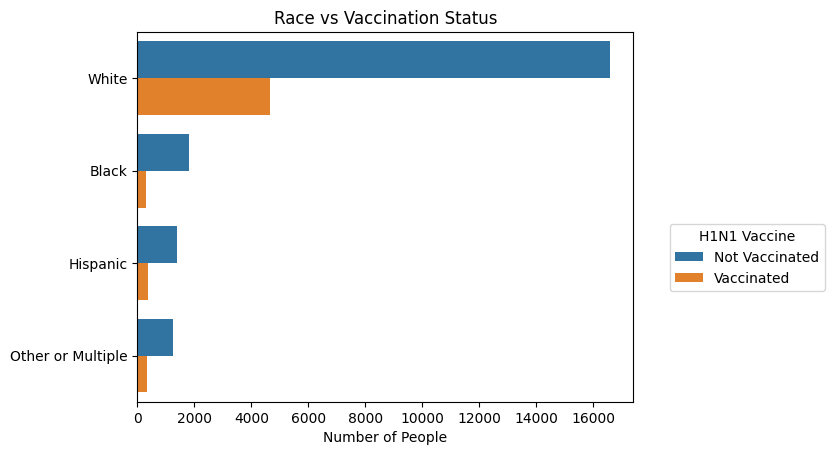

In [ ]:
ax=sns.barplot(data=test_df1, x='values', y='race', hue='h1n1_vaccine', palette= 'tab10')
ax.set_ylabel('')
ax.set_xlabel('Number of People')
ax.set_title('Race vs Vaccination Status')

#ax.legend(['Not Vaccinated', 'Vaccinated'], title = 'H1N1 Vaccine',
#         bbox_to_anchor=(1.4, 0.5));

labels=['Not Vaccinated', 'Vaccinated']
h, l = ax.get_legend_handles_labels()
ax.legend(h, labels, title='H1N1 Vaccine', bbox_to_anchor=(1.4, 0.5));
plt.savefig('race.png', bbox_inches='tight', dpi=300)

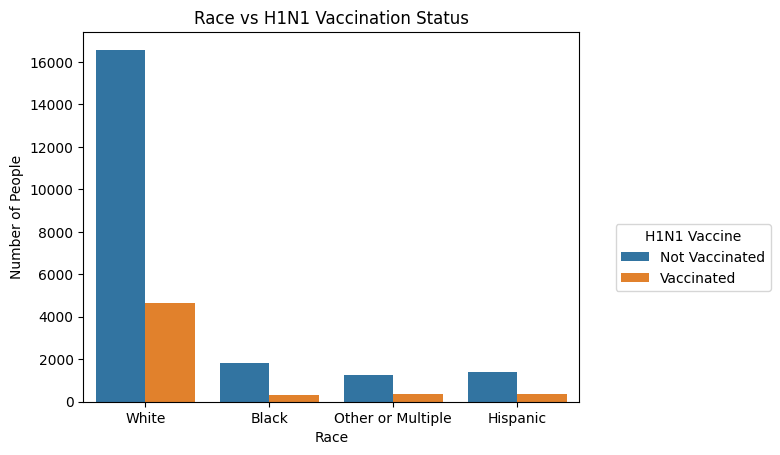

In [ ]:
ax = sns.countplot(data=test_df, x='race', hue='h1n1_vaccine', palette='tab10')
ax.set_ylabel('Number of People')
ax.set_xlabel('Race')
ax.set_title('Race vs H1N1 Vaccination Status')

labels = ['Not Vaccinated', 'Vaccinated']
h, _ = ax.get_legend_handles_labels()
ax.legend(h, labels, title='H1N1 Vaccine', bbox_to_anchor=(1.4, 0.5))

plt.savefig('race.png', bbox_inches='tight', dpi=300)
plt.show()


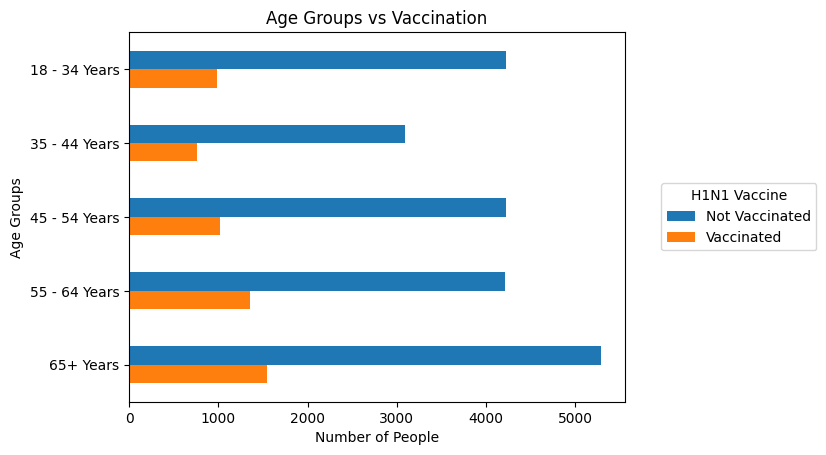

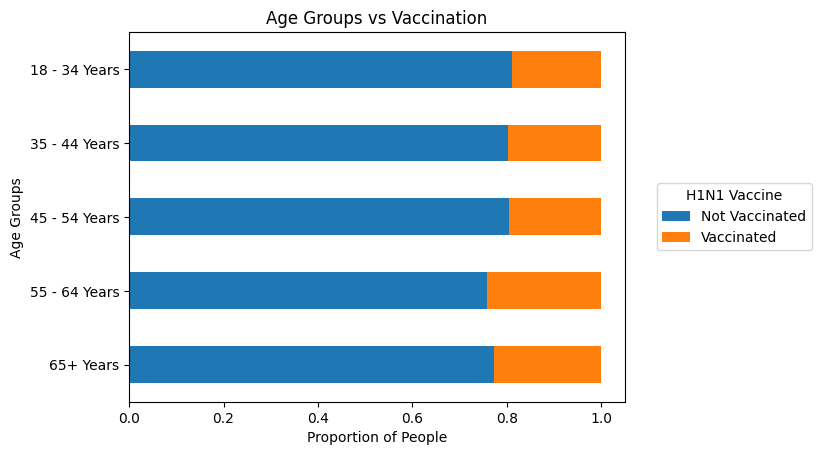

In [ ]:
import matplotlib.pyplot as plt

counts3 = merged_df.groupby(['age_group', 'h1n1_vaccine']).size().unstack('h1n1_vaccine')

# Plotting the bar plot
ax = counts3.plot(kind='barh')
ax.invert_yaxis()

# Customizing the plot
ax.legend(['Not Vaccinated', 'Vaccinated'], loc='center right', bbox_to_anchor=(1.4, 0.5), title='H1N1 Vaccine')
ax.set_ylabel('Age Groups')
ax.set_xlabel('Number of People')
ax.set_title('Age Groups vs Vaccination')

# Saving the plot
plt.savefig('ages.png', bbox_inches='tight', dpi=300)
plt.show()

# Calculate the proportion of vaccinated and not vaccinated individuals within each age group
age_group_totals = counts3.sum(axis=1)
age_group_proportions = counts3.divide(age_group_totals, axis='index')

# Plotting the stacked bar plot
ax = age_group_proportions.plot(kind='barh', stacked=True)
ax.invert_yaxis()

# Customizing the plot
ax.legend(['Not Vaccinated', 'Vaccinated'], loc='center left', bbox_to_anchor=(1.05, 0.5), title='H1N1 Vaccine')
ax.set_ylabel('Age Groups')
ax.set_xlabel('Proportion of People')
ax.set_title('Age Groups vs Vaccination')

plt.show()


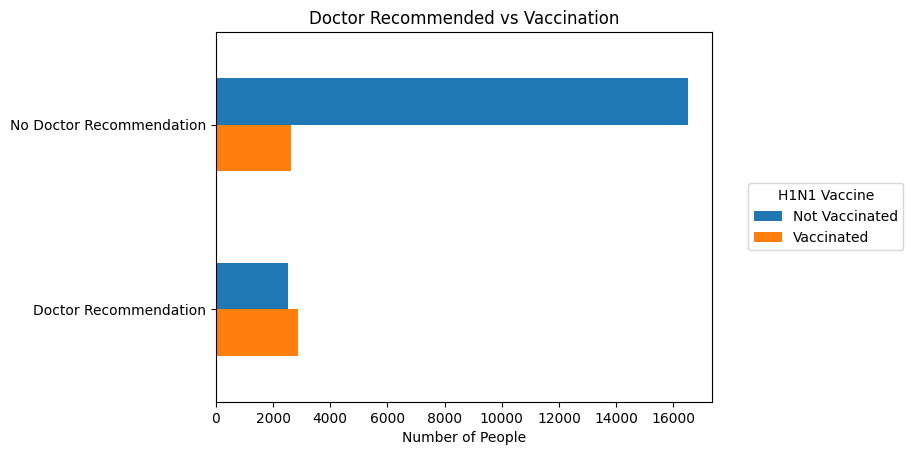

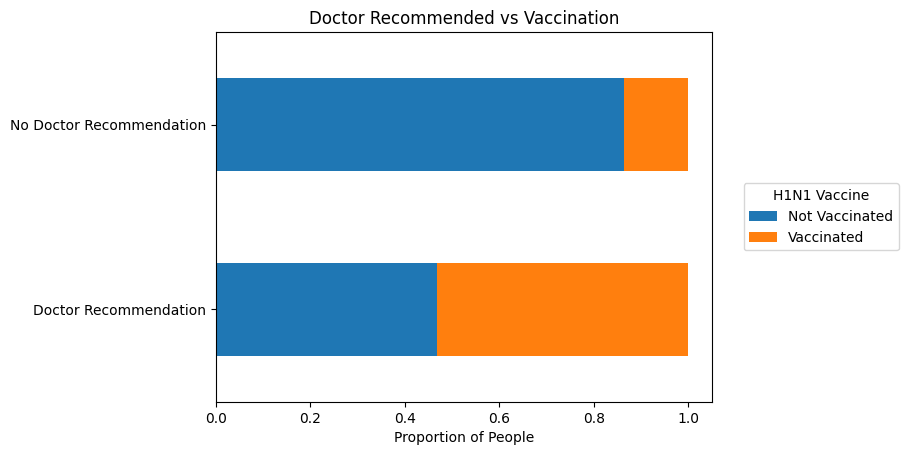

In [ ]:
import matplotlib.pyplot as plt

# Counting the number of vaccinated and not vaccinated individuals for each doctor recommendation
counts4 = (merged_df[['doctor_recc_h1n1', 'h1n1_vaccine']]
              .groupby(['doctor_recc_h1n1', 'h1n1_vaccine'])
              .size()
              .unstack('h1n1_vaccine'))

# Plotting the bar plot
ax = counts4.plot.barh()
ax.invert_yaxis()

# Customizing the plot
ax.legend(['Not Vaccinated', 'Vaccinated'], loc='center right', bbox_to_anchor=(1.4, 0.5), title='H1N1 Vaccine')
ax.set_yticklabels(['No Doctor Recommendation', 'Doctor Recommendation'])
ax.set_ylabel('')
ax.set_xlabel('Number of People')
ax.set_title('Doctor Recommended vs Vaccination')

# Saving the plot
plt.savefig('docrec2.png', bbox_inches='tight', dpi=300)

# Calculating the proportion of vaccinated and not vaccinated individuals for each doctor recommendation
h_ins = counts4.sum(axis='columns')
ins = counts4.div(h_ins, axis='index')

# Plotting the stacked bar plot
ax = ins.plot.barh(stacked=True)
ax.invert_yaxis()

# Customizing the plot
ax.legend(['Not Vaccinated', 'Vaccinated'], loc='center left', bbox_to_anchor=(1.05, 0.5), title='H1N1 Vaccine')
ax.set_yticklabels(['No Doctor Recommendation', 'Doctor Recommendation'])
ax.set_ylabel('')
ax.set_xlabel('Proportion of People')
ax.set_title('Doctor Recommended vs Vaccination')

# Saving the plot
plt.savefig('docrec.png', bbox_inches='tight', dpi=300)



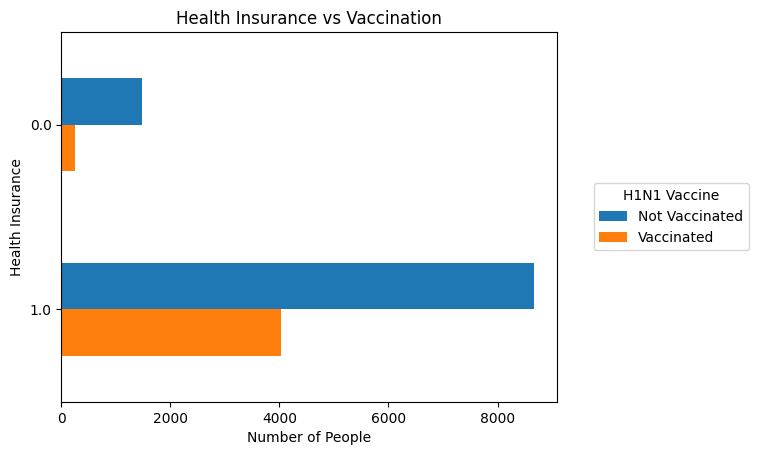

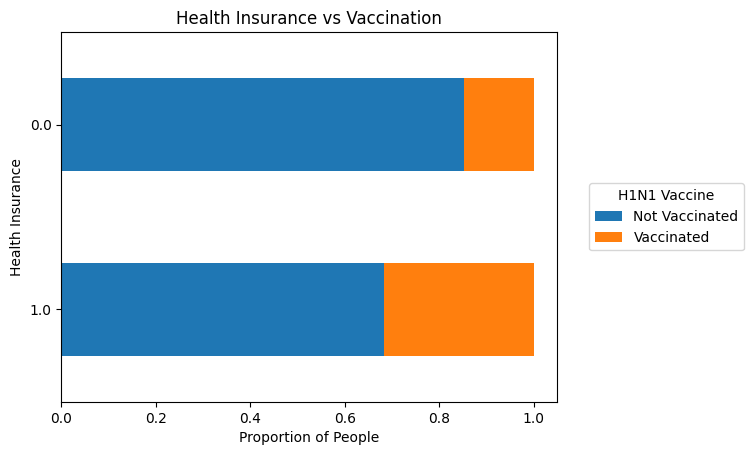

In [ ]:
import matplotlib.pyplot as plt

# Counting the number of vaccinated and not vaccinated individuals for each health insurance status
counts5 = (merged_df[['health_insurance', 'h1n1_vaccine']]
              .groupby(['health_insurance', 'h1n1_vaccine'])
              .size()
              .unstack('h1n1_vaccine'))

# Plotting the bar plot
ax = counts5.plot.barh()
ax.invert_yaxis()

# Customizing the plot
ax.legend(['Not Vaccinated', 'Vaccinated'], loc='center right', bbox_to_anchor=(1.4, 0.5), title='H1N1 Vaccine')
ax.set_ylabel('Health Insurance')
ax.set_xlabel('Number of People')
ax.set_title('Health Insurance vs Vaccination')

# Saving the plot
plt.savefig('income.png', bbox_inches='tight', dpi=300)

# Calculating the proportion of vaccinated and not vaccinated individuals for each health insurance status
income = counts5.sum(axis='columns')
p_income = counts5.div(income, axis='index')

# Plotting the stacked bar plot
ax = p_income.plot.barh(stacked=True)
ax.invert_yaxis()

# Customizing the plot
ax.legend(['Not Vaccinated', 'Vaccinated'], loc='center left', bbox_to_anchor=(1.05, 0.5), title='H1N1 Vaccine')
ax.set_ylabel('Health Insurance')
ax.set_xlabel('Proportion of People')
ax.set_title('Health Insurance vs Vaccination')

# Saving the plot
plt.savefig('income_proportion.png', bbox_inches='tight', dpi=300)


Modeling

```
### This is formatted as code
```



In [ ]:
X = merged_df.drop(['seasonal_vaccine', 'h1n1_vaccine'], axis=1)
y = merged_df['h1n1_vaccine']
X.head()


,respondent_id,h1n1_concern,h1n1_knowledge,behavioral_antiviral_meds,behavioral_avoidance,behavioral_face_mask,behavioral_wash_hands,behavioral_large_gatherings,behavioral_outside_home,behavioral_touch_face,...,income_poverty,marital_status,rent_or_own,employment_status,hhs_geo_region,census_msa,household_adults,household_children,employment_industry,employment_occupation
0,0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,...,Below Poverty,Not Married,Own,Not in Labor Force,oxchjgsf,Non-MSA,0.0,0.0,NaN,NaN
1,1,3.0,2.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,...,Below Poverty,Not Married,Rent,Employed,bhuqouqj,"MSA, Not Principle City",0.0,0.0,pxcmvdjn,xgwztkwe
2,2,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,"<= $75,000, Above Poverty",Not Married,Own,Employed,qufhixun,"MSA, Not Principle City",2.0,0.0,rucpziij,xtkaffoo
3,3,1.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,...,Below Poverty,Not Married,Rent,Not in Labor Force,lrircsnp,"MSA, Principle City",0.0,0.0,NaN,NaN
4,4,2.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,...,"<= $75,000, Above Poverty",Married,Own,Employed,qufhixun,"MSA, Not Principle City",1.0,0.0,wxleyezf,emcorrxb


In [ ]:
y.describe()


count    26707.000000
mean         0.212454
std          0.409052
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max          1.000000
Name: h1n1_vaccine, dtype: float64

In [ ]:
# Train test Split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=1337)
X_train.shape

(20030, 36)

In [ ]:
X_test.shape

(6677, 36)

In [ ]:
y_train.describe()

count    20030.000000
mean         0.210984
std          0.408017
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max          1.000000
Name: h1n1_vaccine, dtype: float64

In [ ]:
y_train.value_counts(normalize=True)

0    0.789016
1    0.210984
Name: h1n1_vaccine, dtype: float64

e notice that the target data is imbalanced, with 79% not getting the vaccine and 21% receiving the vaccine. We want to utilze SMOTE in order to over sample the vaccine class. Can utilize this after encoding for the categorical data.

One-Hot-Encode the categorical data

In [ ]:
# Selecting all of the columns that contain 'objects' to One Hot Encode.
X_train_cat = X_train.select_dtypes('object')

ohe = OneHotEncoder(sparse=False)

dums = ohe.fit_transform(X_train_cat)
dums_df = pd.DataFrame(dums,
                       columns=ohe.get_feature_names_out(input_features=X_train_cat.columns),
                       index=X_train_cat.index)


/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


In [ ]:
#check the information about the dums_df
dums_df.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 20030 entries, 24620 to 3223
Data columns (total 89 columns):
 #   Column                                    Non-Null Count  Dtype  
---  ------                                    --------------  -----  
 0   age_group_18 - 34 Years                   20030 non-null  float64
 1   age_group_35 - 44 Years                   20030 non-null  float64
 2   age_group_45 - 54 Years                   20030 non-null  float64
 3   age_group_55 - 64 Years                   20030 non-null  float64
 4   age_group_65+ Years                       20030 non-null  float64
 5   education_12 Years                        20030 non-null  float64
 6   education_< 12 Years                      20030 non-null  float64
 7   education_College Graduate                20030 non-null  float64
 8   education_Some College                    20030 non-null  float64
 9   education_nan                             20030 non-null  float64
 10  race_Black                     

In [ ]:
dums_df.head()

,age_group_18 - 34 Years,age_group_35 - 44 Years,age_group_45 - 54 Years,age_group_55 - 64 Years,age_group_65+ Years,education_12 Years,education_< 12 Years,education_College Graduate,education_Some College,education_nan,...,employment_occupation_rcertsgn,employment_occupation_tfqavkke,employment_occupation_ukymxvdu,employment_occupation_uqqtjvyb,employment_occupation_vlluhbov,employment_occupation_xgwztkwe,employment_occupation_xqwwgdyp,employment_occupation_xtkaffoo,employment_occupation_xzmlyyjv,employment_occupation_nan
24620,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
5457,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
1936,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
19956,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2502,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


In [ ]:
X_train_nums = X_train.select_dtypes('float64')

ss = StandardScaler()
ss.fit(X_train_nums)

nums_df = pd.DataFrame(ss.transform(X_train_nums), columns=X_train_nums.columns, index=X_train_nums.index)


In [ ]:
#combine the standardized numerical columns (nums_df) and the one-hot encoded categorical columns (dums_df) into a single Dataframe
X_train_clean = pd.concat([nums_df, dums_df], axis=1)
X_train_clean.head()


,h1n1_concern,h1n1_knowledge,behavioral_antiviral_meds,behavioral_avoidance,behavioral_face_mask,behavioral_wash_hands,behavioral_large_gatherings,behavioral_outside_home,behavioral_touch_face,doctor_recc_h1n1,...,employment_occupation_rcertsgn,employment_occupation_tfqavkke,employment_occupation_ukymxvdu,employment_occupation_uqqtjvyb,employment_occupation_vlluhbov,employment_occupation_xgwztkwe,employment_occupation_xqwwgdyp,employment_occupation_xtkaffoo,employment_occupation_xzmlyyjv,employment_occupation_nan
24620,0.420121,-0.419285,-0.226384,0.617385,-0.274045,0.456855,1.345024,1.403181,0.688612,1.889212,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
5457,0.420121,-0.419285,4.417275,0.617385,-0.274045,0.456855,-0.743481,-0.712666,0.688612,-0.529321,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
1936,-1.780802,-0.419285,-0.226384,0.617385,-0.274045,0.456855,1.345024,1.403181,0.688612,-0.529321,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
19956,-0.680340,-0.419285,-0.226384,-1.619735,-0.274045,-2.188880,-0.743481,-0.712666,-1.452197,-0.529321,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2502,-0.680340,-2.037583,4.417275,-1.619735,-0.274045,0.456855,-0.743481,-0.712666,0.688612,1.889212,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


In [ ]:
X_train_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 20030 entries, 24620 to 3223
Columns: 112 entries, h1n1_concern to employment_occupation_nan
dtypes: float64(112)
memory usage: 17.3 MB


In [ ]:
X_test_cat = X_test.select_dtypes('object')

ohe = OneHotEncoder(sparse=False)
test_dums = ohe.fit_transform(X_test_cat)
test_dums_df = pd.DataFrame(test_dums,
                            columns=ohe.get_feature_names_out(X_test_cat.columns),
                            index=X_test_cat.index)


/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


In [ ]:
#performe standard scaling on the numerical columns of X_test and stored the transformed data in test_nums_df
X_test_nums = X_test.select_dtypes('float64')

test_nums = ss.transform(X_test_nums)
test_nums_df = pd.DataFrame(test_nums,
                            columns=X_test_nums.columns,
                            index=X_test_nums.index)

In [ ]:
#concatenate it with test_dums_df to create the final cleaned test dataset:
X_test_clean = pd.concat([test_nums_df, test_dums_df], axis=1)
X_test_clean.head()


,h1n1_concern,h1n1_knowledge,behavioral_antiviral_meds,behavioral_avoidance,behavioral_face_mask,behavioral_wash_hands,behavioral_large_gatherings,behavioral_outside_home,behavioral_touch_face,doctor_recc_h1n1,...,employment_occupation_rcertsgn,employment_occupation_tfqavkke,employment_occupation_ukymxvdu,employment_occupation_uqqtjvyb,employment_occupation_vlluhbov,employment_occupation_xgwztkwe,employment_occupation_xqwwgdyp,employment_occupation_xtkaffoo,employment_occupation_xzmlyyjv,employment_occupation_nan
762,0.420121,-0.419285,4.417275,0.617385,3.649034,0.456855,-0.743481,-0.712666,0.688612,-0.529321,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2299,-0.680340,1.199012,-0.226384,-1.619735,-0.274045,0.456855,-0.743481,-0.712666,-1.452197,-0.529321,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
9680,1.520583,-0.419285,-0.226384,0.617385,-0.274045,0.456855,-0.743481,-0.712666,0.688612,-0.529321,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
15632,0.420121,-0.419285,-0.226384,0.617385,-0.274045,0.456855,-0.743481,-0.712666,0.688612,-0.529321,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
13735,0.420121,-0.419285,-0.226384,0.617385,-0.274045,0.456855,1.345024,1.403181,-1.452197,NaN,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
X_test_clean.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 6677 entries, 762 to 8220
Columns: 112 entries, h1n1_concern to employment_occupation_nan
dtypes: float64(112)
memory usage: 5.8 MB


Utilizing SMOTE

In [ ]:
# Drop samples with missing values from the training and test data
X_train_clean_dropped = X_train_clean.dropna()
y_train_dropped = y_train.loc[X_train_clean_dropped.index]

X_test_clean_dropped = X_test_clean.dropna()
y_test_dropped = y_test.loc[X_test_clean_dropped.index]

# Apply SMOTE to the dropped training data
X_train_resampled, y_train_resampled = smote.fit_resample(X_train_clean_dropped, y_train_dropped)


In [ ]:
from sklearn.impute import SimpleImputer

# Create an instance of SimpleImputer to impute missing values
imputer = SimpleImputer(strategy='mean')

# Fit the imputer on the training data
imputer.fit(X_train_clean)

# Transform the training and test data with the imputer
X_train_imputed = imputer.transform(X_train_clean)
X_test_imputed = imputer.transform(X_test_clean)

# Apply SMOTE to the imputed training data
X_train_resampled, y_train_resampled = smote.fit_resample(X_train_imputed, y_train)


In [ ]:
# View the first few rows of the DataFrame
X_train_clean.head()


,h1n1_concern,h1n1_knowledge,behavioral_antiviral_meds,behavioral_avoidance,behavioral_face_mask,behavioral_wash_hands,behavioral_large_gatherings,behavioral_outside_home,behavioral_touch_face,doctor_recc_h1n1,...,employment_occupation_rcertsgn,employment_occupation_tfqavkke,employment_occupation_ukymxvdu,employment_occupation_uqqtjvyb,employment_occupation_vlluhbov,employment_occupation_xgwztkwe,employment_occupation_xqwwgdyp,employment_occupation_xtkaffoo,employment_occupation_xzmlyyjv,employment_occupation_nan
24620,0.420121,-0.419285,-0.226384,0.617385,-0.274045,0.456855,1.345024,1.403181,0.688612,1.889212,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
5457,0.420121,-0.419285,4.417275,0.617385,-0.274045,0.456855,-0.743481,-0.712666,0.688612,-0.529321,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
1936,-1.780802,-0.419285,-0.226384,0.617385,-0.274045,0.456855,1.345024,1.403181,0.688612,-0.529321,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
19956,-0.680340,-0.419285,-0.226384,-1.619735,-0.274045,-2.188880,-0.743481,-0.712666,-1.452197,-0.529321,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2502,-0.680340,-2.037583,4.417275,-1.619735,-0.274045,0.456855,-0.743481,-0.712666,0.688612,1.889212,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


In [ ]:
# View the summary statistics of y_train_resampled
y_train_resampled.describe()


count    31608.000000
mean         0.500000
std          0.500008
min          0.000000
25%          0.000000
50%          0.500000
75%          1.000000
max          1.000000
Name: h1n1_vaccine, dtype: float64

In [ ]:
y_train_resampled.value_counts()

0    15804
1    15804
Name: h1n1_vaccine, dtype: int64

Models.
Descision trees

In [ ]:
from sklearn.tree import DecisionTreeClassifier

# Create the decision tree model
tree_model = DecisionTreeClassifier(max_depth=2)

# Fit the model to the resampled training data
tree_model.fit(X_train_resampled, y_train_resampled)

# Get the feature importances
feature_importances = tree_model.feature_importances_

# Create a dataframe to display the feature importances
importance_df = pd.DataFrame({'Feature': X_train_clean.columns, 'Importance': feature_importances})
importance_df = importance_df.sort_values(by='Importance', ascending=False)

# Display the feature importances
print(importance_df)


                          Feature  Importance
9                doctor_recc_h1n1     0.61464
14               health_insurance     0.38536
70   employment_industry_fcxhlnwr     0.00000
82   employment_industry_vjjrobsf     0.00000
81   employment_industry_saaquncn     0.00000
..                            ...         ...
35         race_Other or Multiple     0.00000
34                  race_Hispanic     0.00000
33                     race_Black     0.00000
32                  education_nan     0.00000
111     employment_occupation_nan     0.00000

[112 rows x 2 columns]


In [ ]:
from sklearn.tree import DecisionTreeClassifier

from sklearn.tree import DecisionTreeClassifier

# Decision Tree with max_depth of 2 and a random_state of 1337.
tree_clf = DecisionTreeClassifier(max_depth=2, random_state=1337)
tree_clf.fit(X_train_resampled, y_train_resampled)

importance = tree_clf.feature_importances_
feature_names = X_train_clean.columns

# Create a dataframe to display the feature importance
feature_importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': importance})
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

# Display the feature importance
print(feature_importance_df)


                          Feature  Importance
9                doctor_recc_h1n1     0.61464
14               health_insurance     0.38536
70   employment_industry_fcxhlnwr     0.00000
82   employment_industry_vjjrobsf     0.00000
81   employment_industry_saaquncn     0.00000
..                            ...         ...
35         race_Other or Multiple     0.00000
34                  race_Hispanic     0.00000
33                     race_Black     0.00000
32                  education_nan     0.00000
111     employment_occupation_nan     0.00000

[112 rows x 2 columns]


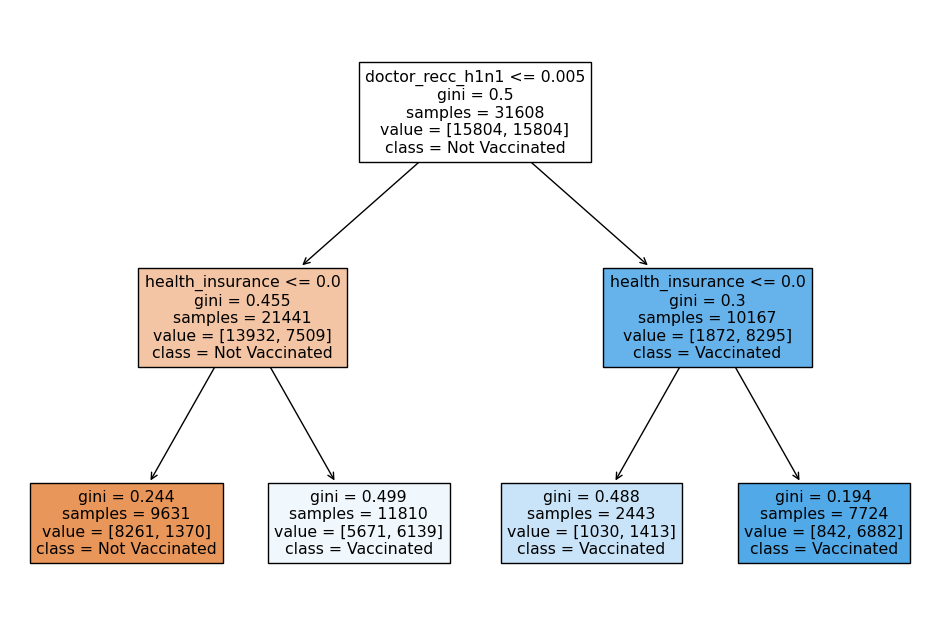

In [ ]:
from sklearn import tree
import matplotlib.pyplot as plt

# Plot the decision tree
plt.figure(figsize=(12, 8))
tree.plot_tree(tree_clf, feature_names=X_train_clean.columns, filled=True, class_names=['Not Vaccinated', 'Vaccinated'])
plt.show()


the descsion tree shows that the two important fetures is the doctors reccomendation and insurance



In [ ]:
from sklearn.impute import SimpleImputer

# Create the imputer with a strategy (e.g., mean, median, mode)
imputer = SimpleImputer(strategy='mean')

# Apply imputation to the selected features
X_train_imputed = imputer.fit_transform(X_train_selected)
X_test_imputed = imputer.transform(X_test_selected)

# Create a logistic regression model
logreg = LogisticRegression()

# Fit the model to the imputed training data
logreg.fit(X_train_imputed, y_train_selected)

# Make predictions on the imputed testing data
y_pred_imputed = logreg.predict(X_test_imputed)

# Evaluate the performance of the model
accuracy_imputed = accuracy_score(y_test_selected, y_pred_imputed)
precision_imputed = precision_score(y_test_selected, y_pred_imputed)
recall_imputed = recall_score(y_test_selected, y_pred_imputed)
f1_imputed = f1_score(y_test_selected, y_pred_imputed)

# Print the evaluation metrics
print("Accuracy (with imputation):", accuracy_imputed)
print("Precision (with imputation):", precision_imputed)
print("Recall (with imputation):", recall_imputed)
print("F1-score (with imputation):", f1_imputed)


Accuracy (with imputation): 0.8085063897763578
Precision (with imputation): 0.5604963805584281
Recall (with imputation): 0.5037174721189591
F1-score (with imputation): 0.5305922662750857


In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

# Create a logistic regression model
logreg = LogisticRegression()

# Fit the model to the training data
logreg.fit(X_train_imputed, y_train_selected)

# Predict the labels for training and testing data
y_train_pred = logreg.predict(X_train_imputed)
y_test_pred = logreg.predict(X_test_imputed)

# Calculate accuracy scores
train_accuracy = accuracy_score(y_train_selected, y_train_pred)
test_accuracy = accuracy_score(y_test_selected, y_test_pred)

# Print the accuracy scores
print("Training Accuracy:", train_accuracy)
print("Testing Accuracy:", test_accuracy)


Training Accuracy: 0.8016242843829051
Testing Accuracy: 0.8085063897763578


our accuracy on the training data is 80% and the Test data is 81%

In [ ]:
from sklearn.impute import SimpleImputer

#calculate the confusion matrix for the predictions made by the decision tree model 
# Create an instance of SimpleImputer to fill missing values with a strategy (e.g., mean, median)
imputer = SimpleImputer(strategy='mean')

# Fit the imputer on the training data and transform both training and testing data
X_train_imputed = imputer.fit_transform(X_train_clean)
X_test_imputed = imputer.transform(X_test_clean)

# Make predictions on the test data using the decision tree model
y_pred = tree_clf.predict(X_test_imputed)

# Calculate the confusion matrix
cm = confusion_matrix(y_test, y_pred)

print(cm)


[[2695 2534]
 [ 202 1246]]


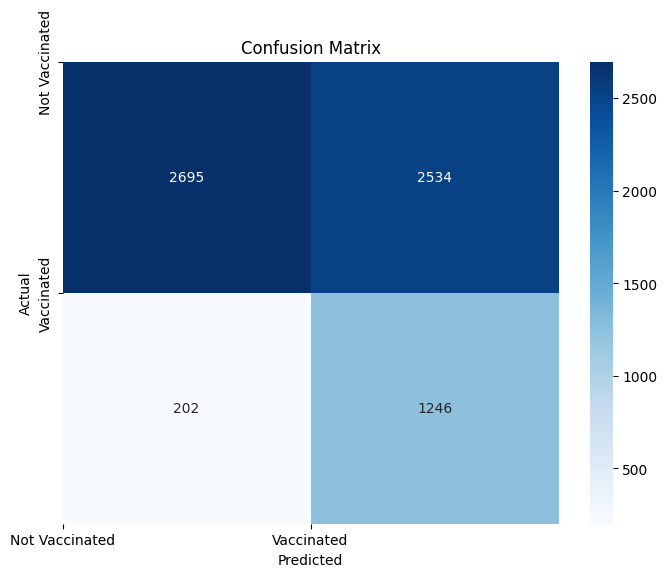

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Create a confusion matrix heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')

# Add labels, title, and axis ticks
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.xticks([0, 1], ['Not Vaccinated', 'Vaccinated'])
plt.yticks([0, 1], ['Not Vaccinated', 'Vaccinated'])

# Show the plot
plt.show()


In [ ]:
from sklearn.metrics import precision_score

# Calculate the precision score for the test predictions
precision = precision_score(y_test, y_pred)

print("Precision:", precision)


Precision: 0.3296296296296296


Second model.


In [ ]:
from sklearn.impute import SimpleImputer

# Impute missing values in numerical features with mean imputation
imputer = SimpleImputer(strategy='mean')
X_train_clean_imputed = imputer.fit_transform(X_train_clean)

# Impute missing values in categorical features with mode imputation
imputer = SimpleImputer(strategy='most_frequent')
X_train_clean_imputed = imputer.fit_transform(X_train_clean)


In [ ]:
print("X_train_clean shape:", X_train_clean.shape)
print("y_train_resampled shape:", y_train_resampled.shape)


X_train_clean shape: (20030, 112)
y_train_resampled shape: (31608,)


In [ ]:
from sklearn.impute import SimpleImputer

# Create an imputer object
imputer = SimpleImputer(strategy='mean')

# Fit the imputer on the training data
imputer.fit(X_train_clean)

# Transform the training data
X_train_clean_imputed = imputer.transform(X_train_clean)

# Create and fit the decision tree classifier
tree_clf_2 = DecisionTreeClassifier(max_depth=5, random_state=1337)
tree_clf_2.fit(X_train_clean_imputed, y_train_resampled_subset)


DecisionTreeClassifier(max_depth=5, random_state=1337)

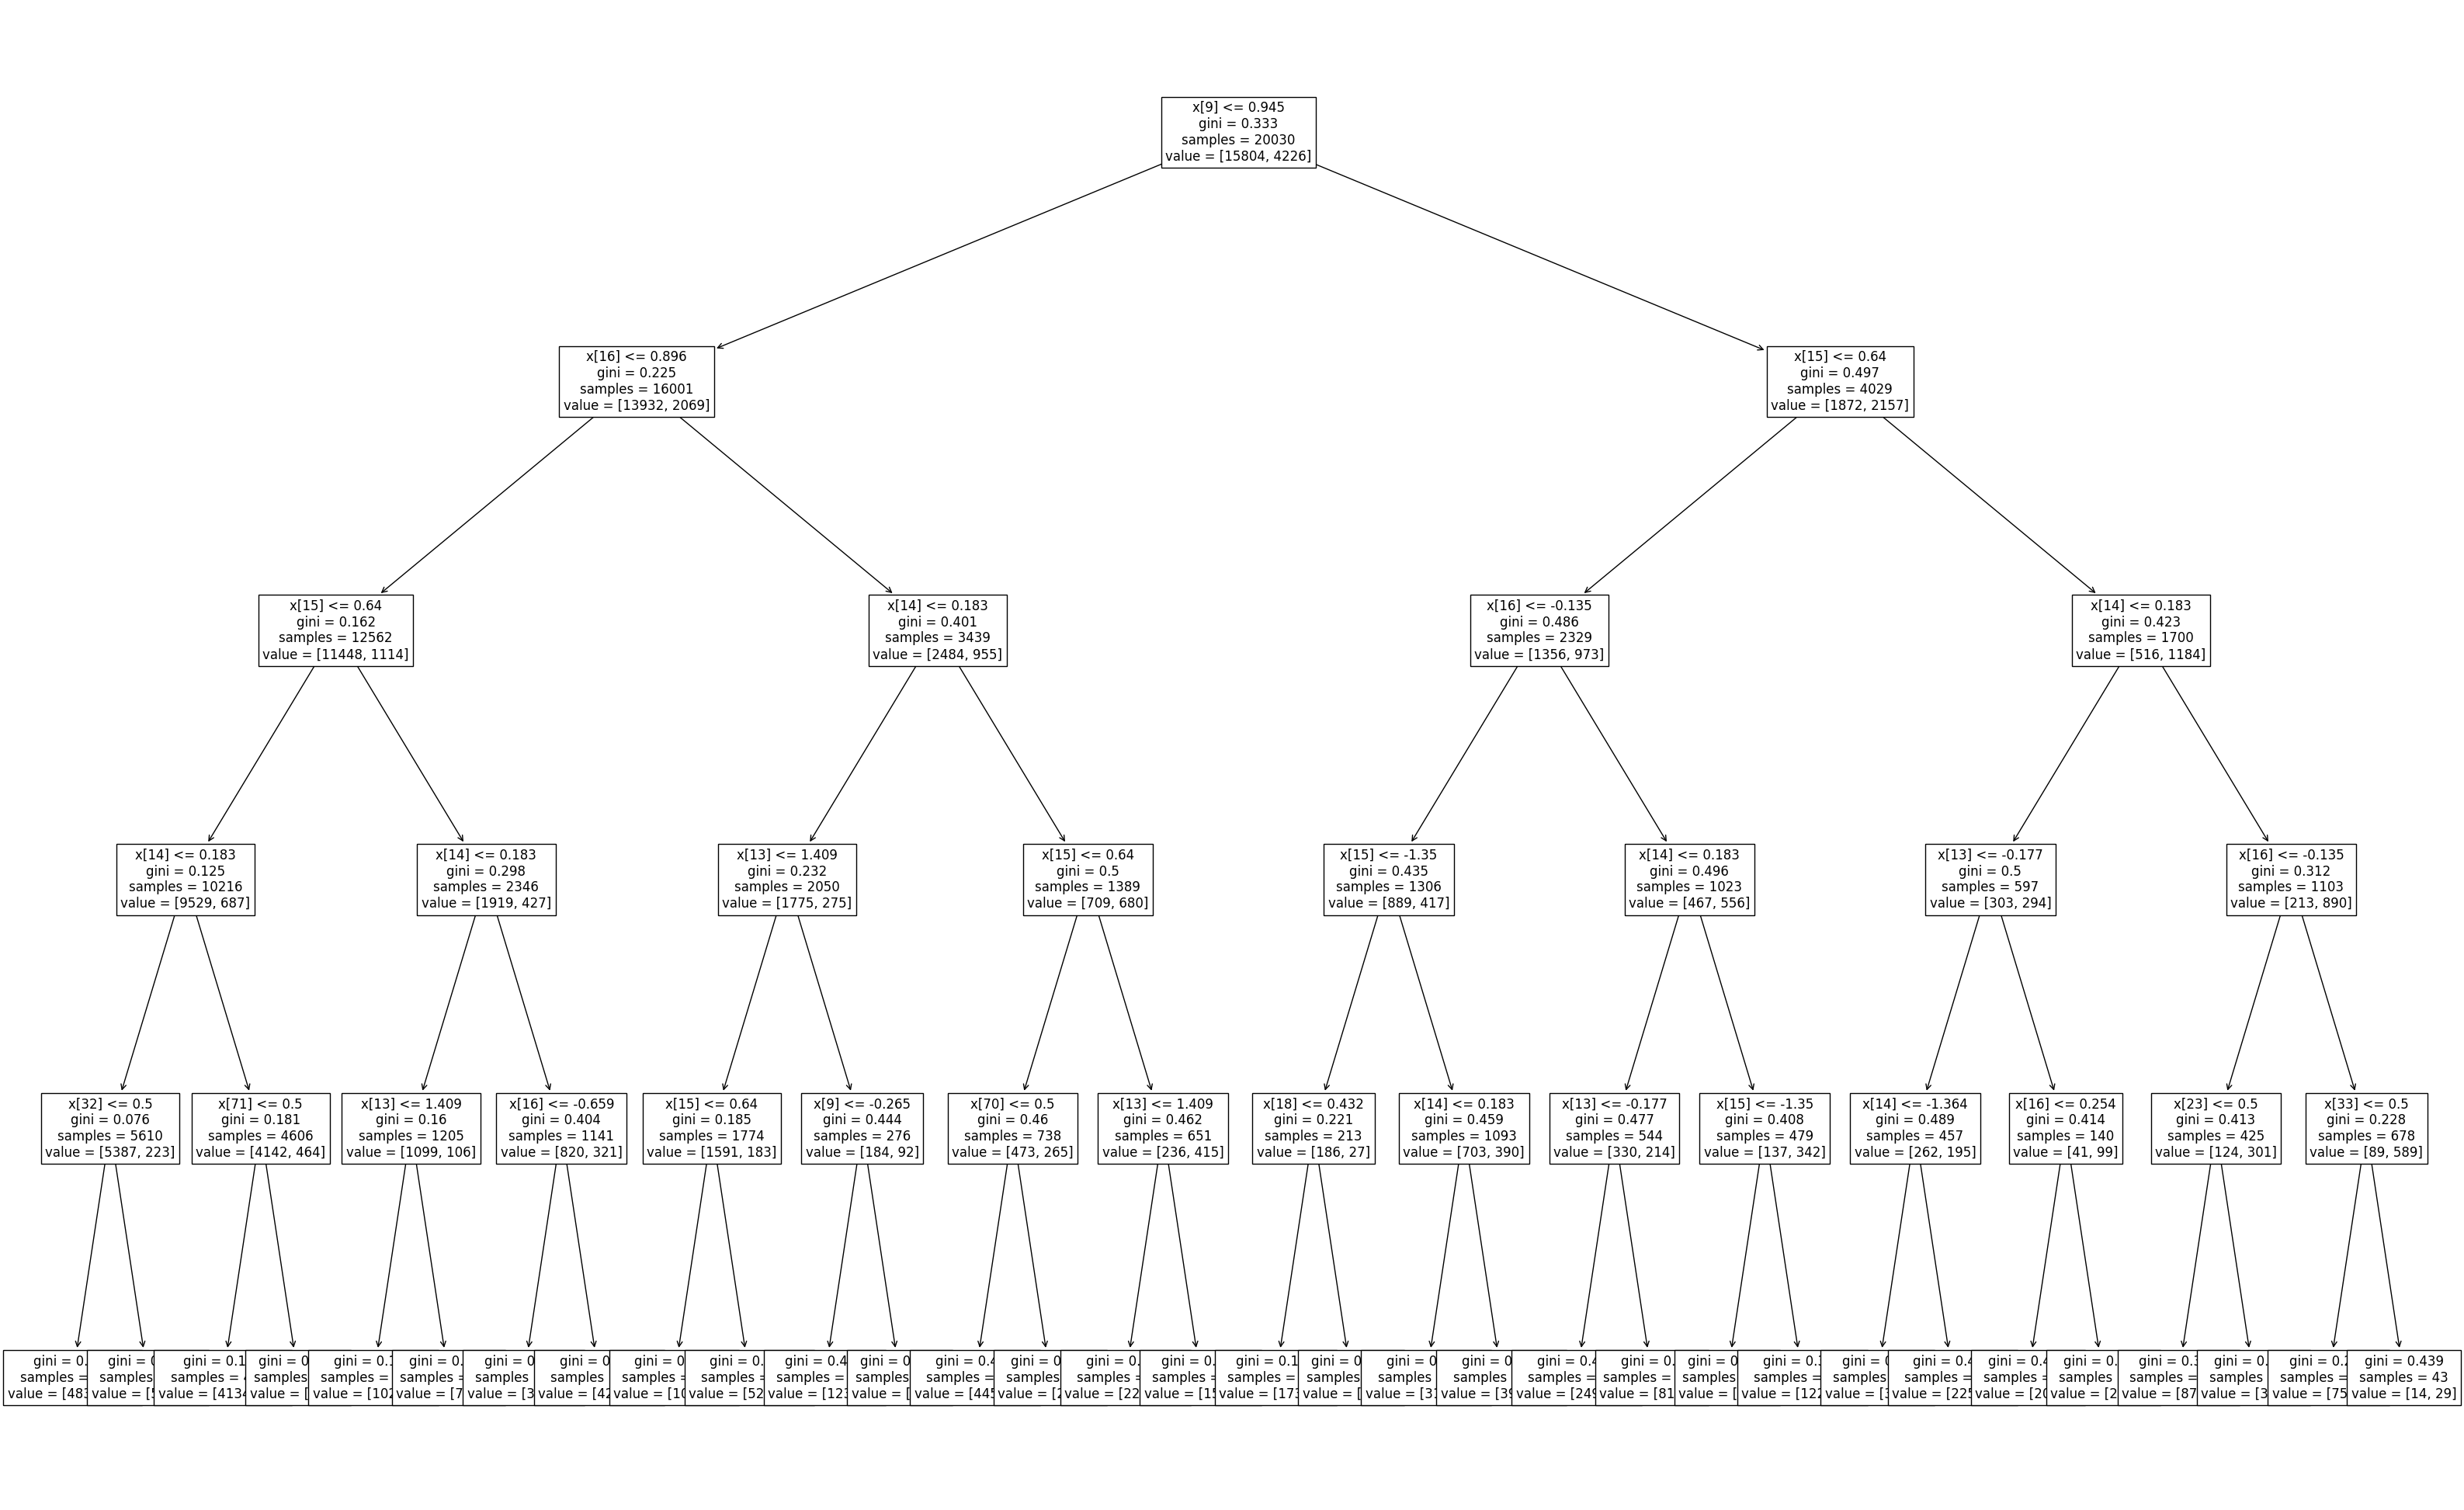

In [ ]:
import matplotlib.pyplot as plt
from sklearn import tree

plt.figure(figsize=(40, 25))
tree.plot_tree(tree_clf_2, fontsize=12)
plt.show()


In [ ]:
#calculating the accuracy of the train and test data
# Calculate accuracy on training data
train_accuracy = tree_clf_2.score(X_train_imputed, y_train)

# Calculate accuracy on testing data
test_accuracy = tree_clf_2.score(X_test_imputed, y_test)

print('Training Accuracy:', train_accuracy)
print('Testing Accuracy:', test_accuracy)


Training Accuracy: 0.8484772840738891
Testing Accuracy: 0.8388497828366033


In [ ]:
 #calculate the confusion matrix using the predicted labels
y_pred_3 = tree_clf_2.predict(X_test_imputed)
cm_3 = confusion_matrix(y_test, y_pred_3)

print("Confusion Matrix:")
print(cm_3)


Confusion Matrix:
[[5000  229]
 [ 847  601]]


In [ ]:
#calculating the precision within our model
precision = cm_3[1, 1] / (cm_3[1, 1] + cm_3[0, 1])
print("Precision:", precision)


Precision: 0.7240963855421687


In [ ]:
#calculating the importance
importance_scores = tree_clf_2.feature_importances_
feature_names = X_train_clean.columns

# Create a dictionary to map feature names to importance scores
feature_importances = dict(zip(feature_names, importance_scores))

# Sort the features based on their importance scores in descending order
sorted_features = sorted(feature_importances.items(), key=lambda x: x[1], reverse=True)

# Print the important features and their scores
for feature, score in sorted_features:
    print(f"{feature}: {score}")


doctor_recc_h1n1: 0.486141788212135
health_insurance: 0.1887583058595066
opinion_h1n1_vacc_effective: 0.13155960019863897
opinion_h1n1_risk: 0.12724764004987707
health_worker: 0.0337973346426029
employment_industry_fcxhlnwr: 0.012545881737271707
employment_industry_haxffmxo: 0.008284072046023203
education_nan: 0.004265901590055689
age_group_18 - 34 Years: 0.004059641054348122
opinion_seas_vacc_effective: 0.0017704534601999055
race_Black: 0.0015693811493408298
h1n1_concern: 0.0
h1n1_knowledge: 0.0
behavioral_antiviral_meds: 0.0
behavioral_avoidance: 0.0
behavioral_face_mask: 0.0
behavioral_wash_hands: 0.0
behavioral_large_gatherings: 0.0
behavioral_outside_home: 0.0
behavioral_touch_face: 0.0
doctor_recc_seasonal: 0.0
chronic_med_condition: 0.0
child_under_6_months: 0.0
opinion_h1n1_sick_from_vacc: 0.0
opinion_seas_risk: 0.0
opinion_seas_sick_from_vacc: 0.0
household_adults: 0.0
household_children: 0.0
age_group_35 - 44 Years: 0.0
age_group_45 - 54 Years: 0.0
age_group_55 - 64 Years: 0.

In [ ]:
tree_clf_2.feature_importances_

array([0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.48614179,
       0.        , 0.        , 0.        , 0.03379733, 0.18875831,
       0.1315596 , 0.12724764, 0.        , 0.00177045, 0.        ,
       0.        , 0.        , 0.        , 0.00405964, 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.0042659 , 0.00156938, 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.01254588, 0.00828407, 0.        , 0.        , 0.     

Running an ROC curve


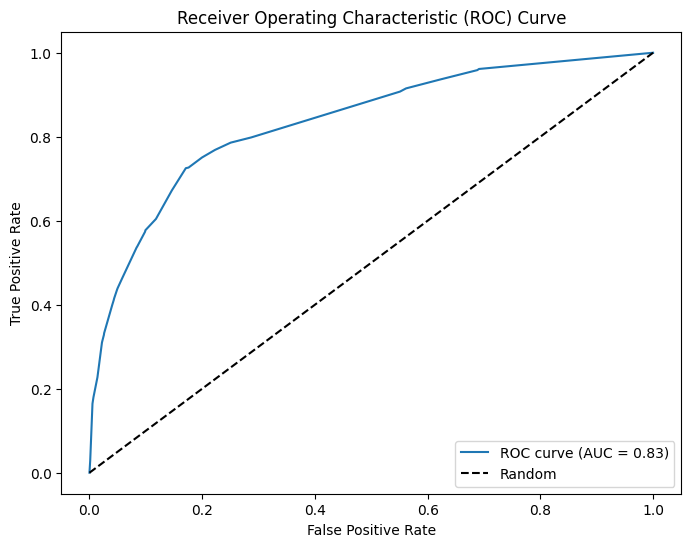

In [81]:
from sklearn.impute import SimpleImputer
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import roc_curve, roc_auc_score
import matplotlib.pyplot as plt

# Create the imputer with a strategy (e.g., mean, median, mode)
imputer = SimpleImputer(strategy='mean')

# Apply imputation to the training and test datasets
X_train_imputed = imputer.fit_transform(X_train_clean)
X_test_imputed = imputer.transform(X_test_clean)

# Train the decision tree model
tree_clf = DecisionTreeClassifier(max_depth=5, random_state=1337)
tree_clf.fit(X_train_imputed, y_train)

# Make predictions on the test set
y_pred_prob = tree_clf.predict_proba(X_test_imputed)[:, 1]

# Compute the false positive rate, true positive rate, and threshold values for the ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)

# Compute the area under the ROC curve (AUC)
auc = roc_auc_score(y_test, y_pred_prob)

# Plot the ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label='ROC curve (AUC = %0.2f)' % auc)
plt.plot([0, 1], [0, 1], 'k--', label='Random')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()


The AUC score represents the overall performance of the model. It ranges between 0 and 1, with 0.83  indicating a perfect classifier. A higher AUC score signifies better discrimination between positive and negative classes.



EVALUATION


Based on the results of the National 2009 H1N1 Flu Survey and the ML models developed, the findings suggest that the models had moderate performance in predicting the H1N1 vaccine status. The precision score of 0.81 indicates that a  portion of individuals who received the vaccine was correctly identified by the models. However, there is still room for improvement in terms of accuracy.

One limitation of the study is that it only considered data from a single year, which may not capture the full complexity and variability of vaccine uptake over time. Moreover, the presence of imbalanced data and potential inaccuracies in the modeling process could have influenced the performance of the models. It is important to acknowledge that the findings are specific to the dataset and ML models used in this study.

Despite these limitations, the results highlight the potential of ML models in predicting vaccine uptake and informing public health interventions. Further research and refinement of the models are necessary to enhance their accuracy and generalizability. Additionally, considering data from multiple years and incorporating more comprehensive features may provide a more robust understanding of the factors influencing vaccine decisions.

In [83]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive
